# Сегментация пользователей банка по используемым продуктам #

<a id="content"></a>
## СОДЕРЖАНИЕ ##
[Введение](#intro) \
[Глава 1. Загрузка и изучение данных](#step1) \
[Выводы по главе 1](#step1_conc) \
[Глава 2. Предобработка данных](#step2) \
[Выводы по главе 2](#step2_conc) \
[Глава 3. Добавление в таблицу новых столбцов-маркеров по столбцам с категориальными параметрами](#step3) \
[Выводы по главе 3](#step3_conc) \
[Глава 4. Исследовательский анализ данных](#step4) \
[Выводы по главе 4](#step4_conc) \
[Глава 5. Проверка статистических гипотез](#step5) \
[Выводы по главе 5](#step5_conc) \
[Глава 6. Сегментация пользователей](#step6) \
[Выводы по главе 6](#step6_conc) \
[Глава 7. Выводы и рекомендации для отдела маркетинга](#step7)

<a id="intro"></a>
## [Введение](#content) ##

**Описание данных** \
USERID — идентификатор пользователя \
score — баллы кредитного скоринга \
city — город \
gender — пол \
age — возраст \
equity — количество объектов в собственности \
balance — баланс на счёте \
products — количество продуктов, которыми пользуется клиент \
credit_card — есть ли кредитная карта \
last_activity — активный клиент \
est_salary — заработная плата клиента \
churn — ушёл или нет 

**Цель данного исследования** - для отдела маркетинга сегментировать пользователей по количеству используемых продуктов и признакам отточности и неотточности.


Для достижения поставленных целей необходимо выполнить следующие **шаги**:\
**1. Загрузка и изучение данных**
- Загрузка данных и изучение общей информации;
- Изучение всех параметров датасета (распределение значений, поиск уникальных значений и тд).

**2. Предобработка данных**
- Проверка корректности наименований колонок;
- Поиск пропусков, их изучение, работа с ними (исключение из базы данных / заполнение / игнорирование);
- Исследование соответствия типов данных, приведение их к правильному типу;
- Исследование дубликатов и их удаление;
- Поиск неявных дубликатов.
.

**3. Добавление в таблицу новых столбцов-маркеров по столбцам с качественными параметрами**
- приведение к бинарному типу значения в столбце “пол”;
- кодировка к бинарному типу категориальных значений городов (отдельный столбец для каждого города).

**4. Исследовательский анализ данных**
- сравнение пользователей по различным параметрам: город, возраст, наличие кредитной карты и тд.;
- распределение непрерывных данных на диапазоны, их изучение;
- исследование признаков и их диапазонов в разрезе оттока;
- исследование корреляции параметров и их диапазонов с оттоком и количеством продуктов.

**5. Проверка статистических гипотез:**
- формирование выборок;
- выбор статистического теста (Спирмен или phik), обоснование выбора;
- проверка статистической гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
- после исследования данных, сформулировать и проверить гипотезу, исходя из сравнения типичных клиентов банка;
- возможно, после изучения данных, потребуется формулировка дополнительных гипотез.

**6. Сегментация пользователей**
- Определение 2-3 достаточно крупных сегментов потребителей банка;
- Изучение и подсчет основных показателей данных сегментов.

<a id="step1"></a>

## [Глава 1. Загрузка и изучение данных](#content) ##
    
Загружаем необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.mlab as mlt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import phik

from scipy import stats as st

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

Получаем общие сведение о датфрейме

In [3]:
df = pd.read_csv('/Users/paveldenisov/Desktop/datasets/bank_scrooge.csv')

In [4]:
df.shape

(10000, 12)

In [5]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


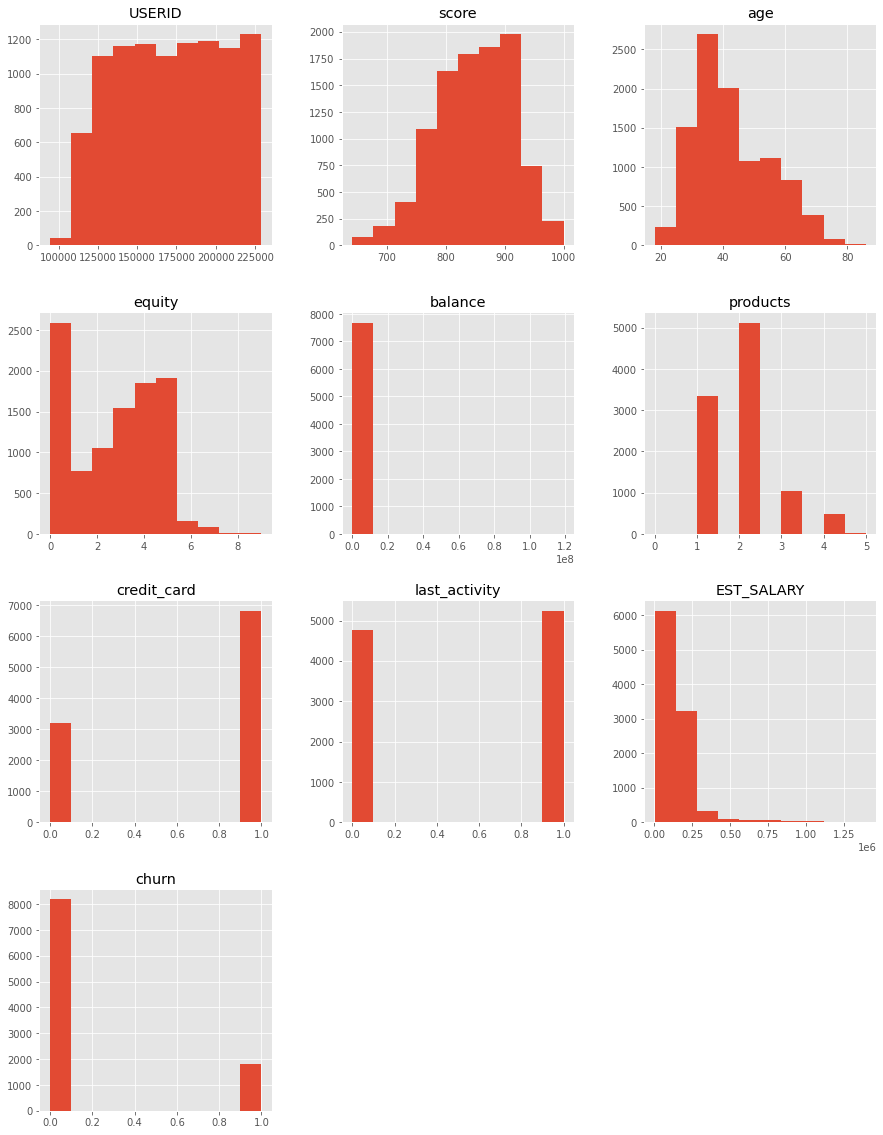

In [8]:
df.hist(figsize=(15,20))
plt.show()

In [9]:
round(df.describe())

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.0,10000.0,9974.0,10000.0,7705.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,171815.0,849.0,43.0,3.0,827794.0,2.0,1.0,1.0,147867.0,0.0
std,33708.0,65.0,12.0,2.0,1980614.0,1.0,0.0,0.0,139389.0,0.0
min,94561.0,642.0,18.0,0.0,0.0,0.0,0.0,0.0,2546.0,0.0
25%,142810.0,802.0,33.0,0.0,295554.0,1.0,0.0,0.0,75252.0,0.0
50%,172728.0,853.0,40.0,3.0,524272.0,2.0,1.0,1.0,119658.0,0.0
75%,201262.0,900.0,51.0,4.0,980706.0,2.0,1.0,1.0,174501.0,0.0
max,229145.0,1000.0,86.0,9.0,119113552.0,5.0,1.0,1.0,1395064.0,1.0


<a id="step1_conc"></a>
### [Вывод по главе 1](#content) ### 
Данные качественные и, на первый взгляд, подходят для достижения поставленной цели.

<a id="step2"></a>
## [Глава 2. Предобработка данных](#content) ##

Проверка корректности наименований колонок

In [10]:
df.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

In [11]:
df = df.rename(columns={'USERID':'user_id',
                   'EST_SALARY':'est_salary'})

In [12]:
# при узучении данных были видны пользователи, которые не пользуются ни одним продуктом
# рассмотрим их
df.loc[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Всего один пользователь, который ушел или собирается уйти. Удалим его из базы данных.

In [13]:
df = df.loc[df['products'] > 0]

Ищем пропуски, изучаем и работам с ними

In [14]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [15]:
# узнаем количество пропусков в процентном соотношении
pd.DataFrame(df.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
user_id,0.0
score,0.0
city,0.0
gender,0.0
age,0.3
equity,0.0
balance,22.9
products,0.0
credit_card,0.0
last_activity,0.0


Работаем с пропусками с столбце возроста

In [16]:
df.query('age.isna()')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Какой-либо закономерности в появлении пропуской не обнаружено. Удаляем строки с пропусками.

In [17]:
df = df.loc[~df['age'].isna()]

Работаем с пропусками в столбце с даннами о балансе на счету. Удалить такой объем данных невозможно. Изучаем пропуски

In [18]:
# создадаем копию базы данных, чтобы в ней отобразить в отдельном столбце наличие пропусков в столбце баланса
df_copy = df.copy()

In [19]:
#  создаем дополнительные столбцы-маркеры, один из которых показывает налие пропуска в сталбце баланса
df_copy = pd.get_dummies(df_copy, columns=['balance'], dummy_na=True) 

In [20]:
df = df.merge(df_copy[['user_id', 'balance_nan']], how='left', on='user_id')

In [21]:
# сосдадим список колонок, которые подходят для отображения методом histplot
# создаем список колонок с бинарными или дискретными данными
col_for_hist = ['score', 'age', 'est_salary']
col_bin_dis = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']

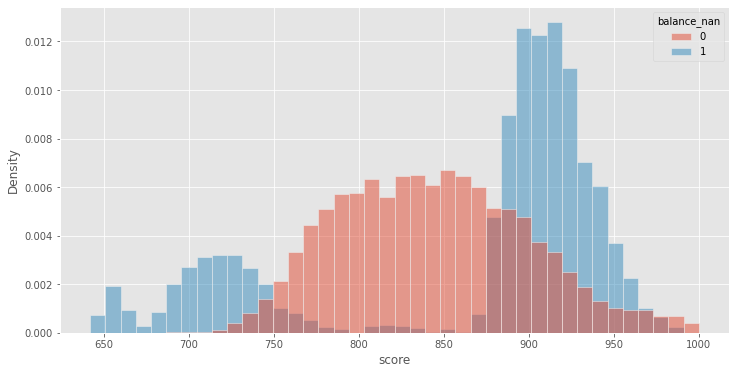

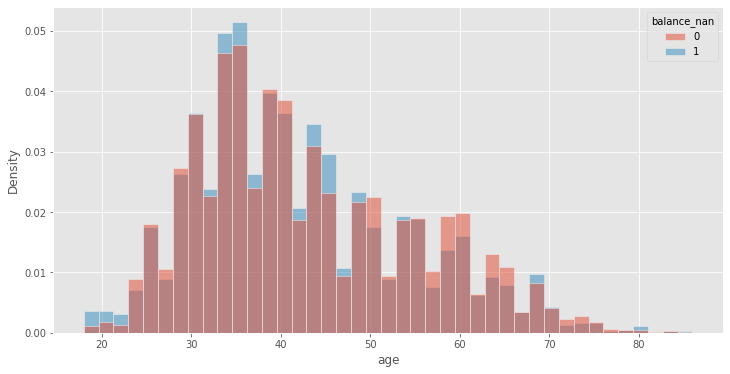

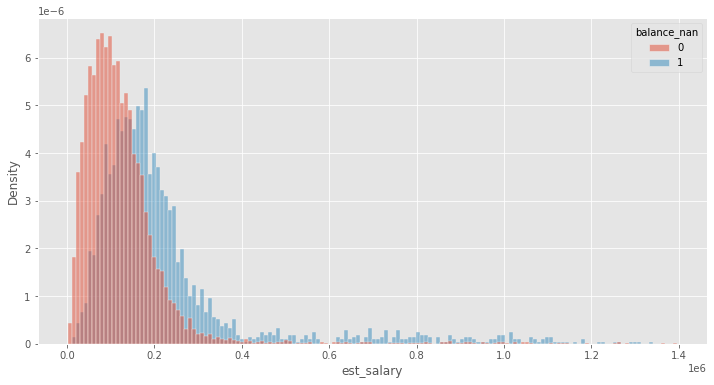

In [22]:
# узнаем как распределены кредитный скоринг, возраст и заработная плата
# в разрезе наличия/отсутствия пропусков в столбце баланса 
for i in col_for_hist:
    sns.histplot(data=df, x=i, hue='balance_nan', common_norm=False, stat='density')
    plt.show()

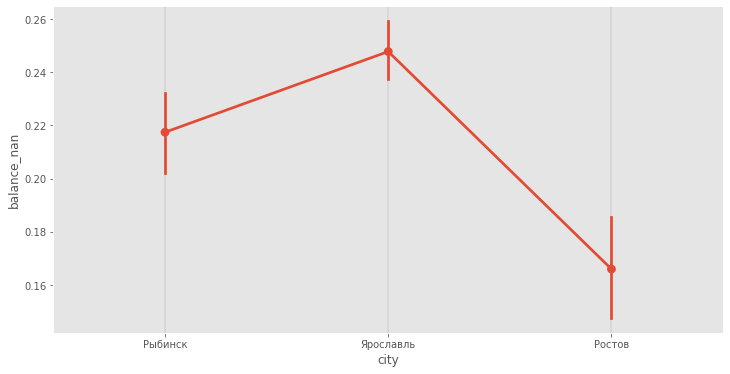

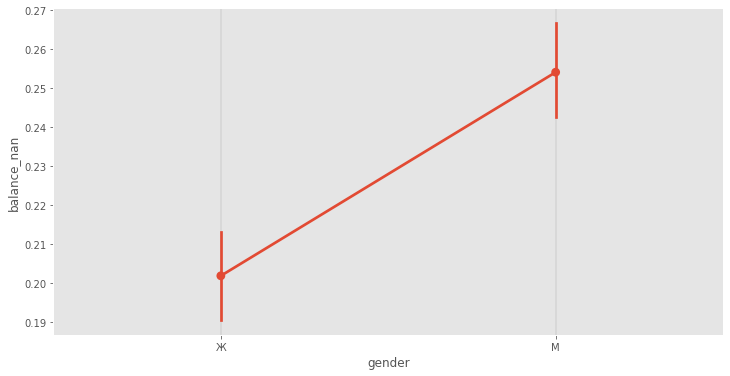

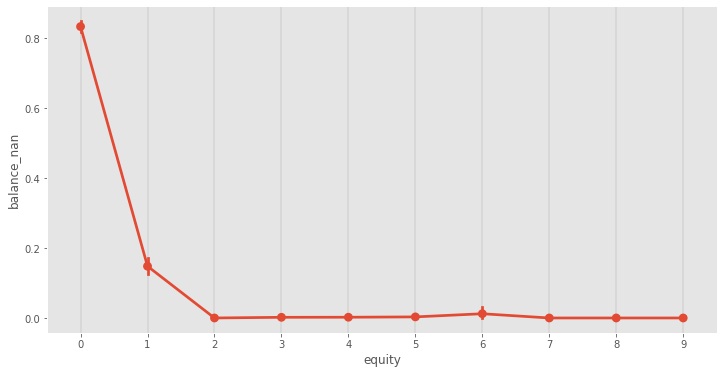

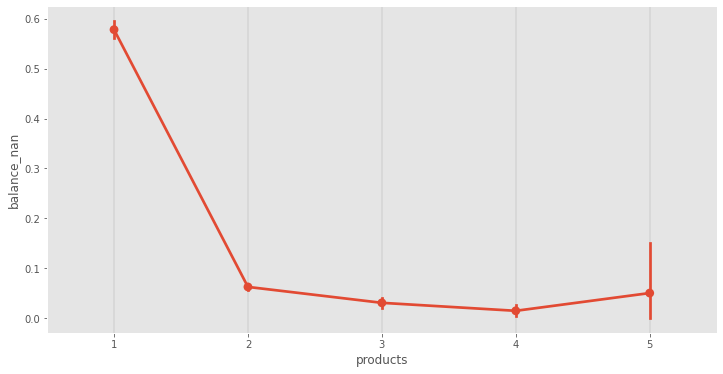

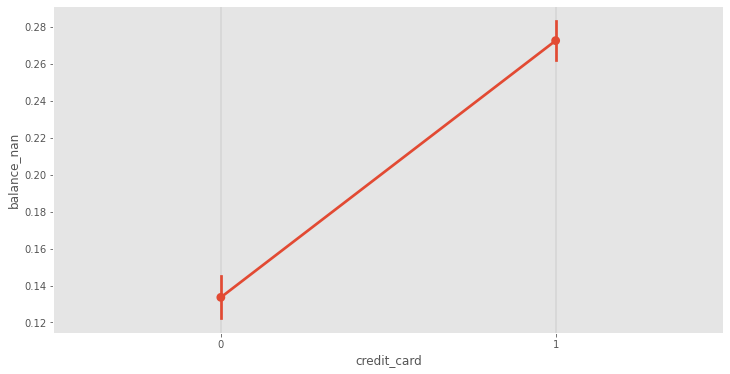

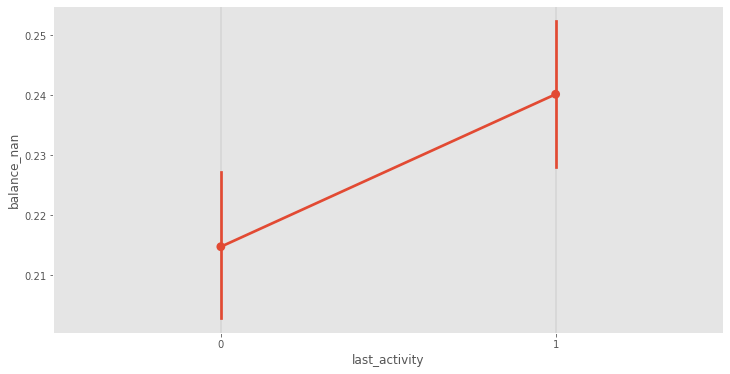

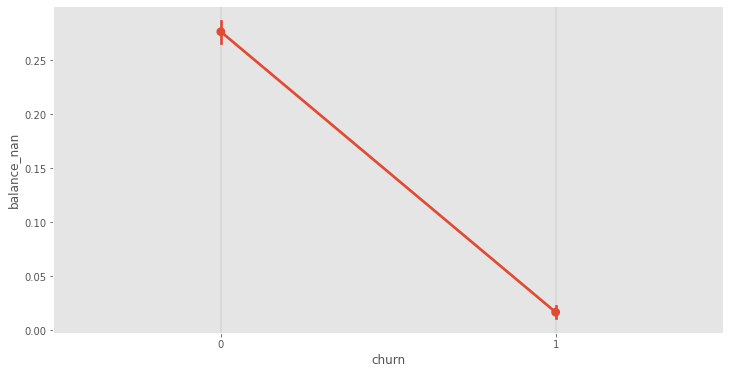

In [23]:
# узнаем, как распределены пропуски в балансе в группировке по оставшимся бинарным и дискретным параметрам
for i in col_bin_dis:
    fig, ax = plt.subplots( figsize=(12, 6))
    sns.despine(left=False, ax=ax)
    sns.pointplot(data=df, x=i, y='balance_nan', ax=ax)
    ax.grid( color='grey', lw=0.25)

Из интересных наблюдений:
1. Клиенты с пропусками в балансе преобладают со значениями кредитного скоринга либо с минимальных значений до 750, либо от 890 до 970. В то же время, клиенты без пропусков сконцентрированы в диапазоне 800-850.
2. Подавляющее количество клиентов с пропуском имеют балл за имещуство равный 0.
3. Клиенты с пропусками чаще всего пользуются 1 продуктом банка.
4. Заработная плата таких клиентов смещена в верхнюю сторону.

Узнаем, у какого процента клиентов без данных о балансе имеют кредитную карту.

In [24]:
print(round(df.query('balance_nan == 1 and credit_card == 1')['user_id'].count() / df.query('balance_nan == 1')['user_id'].count() * 100, 2), '%')

81.24 %


Удалим из дата фрейма столбец balance_nan

In [25]:
df = df.drop(columns='balance_nan', axis=1)

Исходя из наблюдений, можно сделать вывод, что большинство клиентов с пропусками - это хорошо обеспеченные клиенты с кредитными картами.
Причину в пропусках на имеющихся данных однозначно определить не удается.

Проверим датафрейм на наличие дубликатов

In [26]:
df.duplicated().sum()

100

In [27]:
df = df.drop_duplicates()

Поверим на наличие неявных дебликатов, а именно - повторение user_id

In [28]:
df['user_id'].duplicated().sum()

50

Изучаем данные строки

In [29]:
# добавим в список колонок, подходящих для визуализации гистограммой, колонку balance
col_for_hist.append('balance')

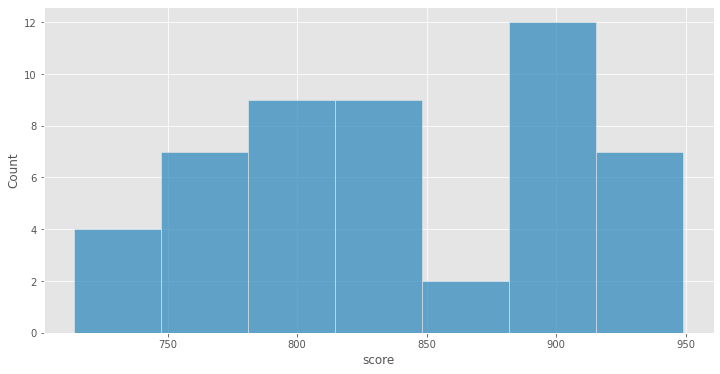

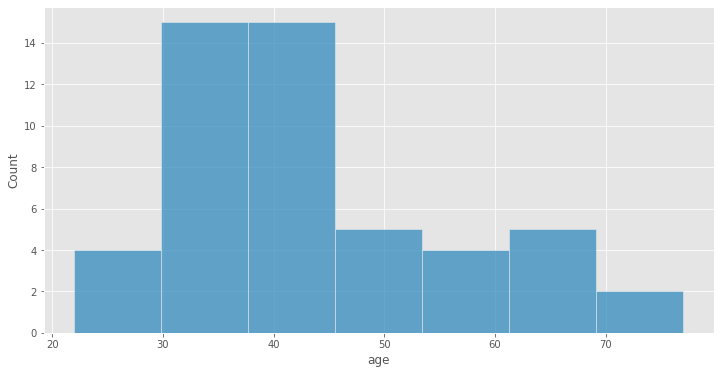

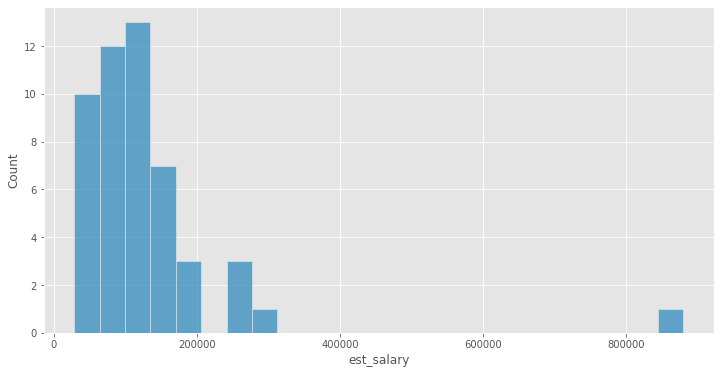

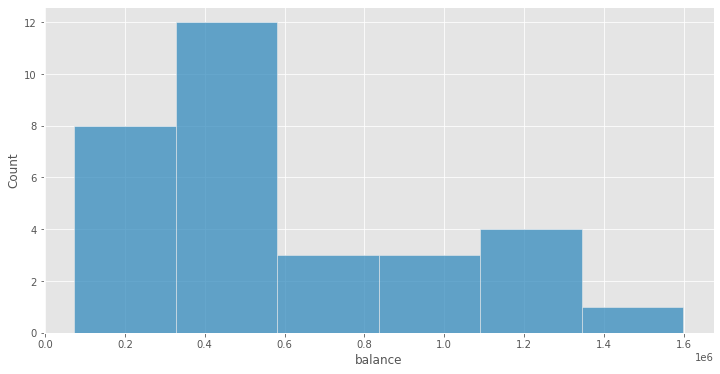

In [30]:
for i in col_for_hist:
    sns.histplot(data=df.loc[df['user_id'].duplicated()], x=i)
    plt.show()

In [31]:
for i in col_bin_dis:
    print((df.loc[df['user_id'].duplicated()].groupby(i)[i].count()).sort_values(ascending=False))
    print()

city
Рыбинск      29
Ярославль    21
Name: city, dtype: int64

gender
Ж    30
М    20
Name: gender, dtype: int64

equity
0    22
3     9
4     6
2     5
5     5
1     2
7     1
Name: equity, dtype: int64

products
2    24
1    17
3     9
Name: products, dtype: int64

credit_card
1    36
0    14
Name: credit_card, dtype: int64

last_activity
0    29
1    21
Name: last_activity, dtype: int64

churn
0    50
Name: churn, dtype: int64



Интересное наблюдение - дубликаты из Ростова отсутствуют. Узнаем больше о дубликатах.

In [32]:
# найдем список дублирующихся user_id
dub_list = []
for i in df['user_id'].unique():
    if df.loc[df['user_id'] == i]['user_id'].count() > 1:
        dub_list.append(i)

In [33]:
# визуально изучим параметры у данных клиентов
df.loc[df['user_id'].isin(dub_list)].sort_values(by='user_id').head(50)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1910,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7754,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4907,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7601,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5917,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5951,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
1421,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8703,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9845,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8226,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


In [34]:
# проверим, всех ли дубликаты  распределены по двум городам или какой-то дубликат есть и внутри одного города
df.loc[df['user_id'].isin(dub_list)].groupby('user_id')['city'].count()

user_id
116540    2
117943    2
120258    2
123461    2
124450    2
126368    2
129785    2
131419    2
140377    2
141265    2
143592    2
148826    2
149365    2
150667    2
152479    2
155765    2
155872    2
160075    2
162053    2
163207    2
164676    2
168998    2
170312    2
171751    2
172142    2
175730    2
181526    2
183510    2
185748    2
188957    2
190253    2
191520    2
195884    2
197364    2
199312    2
200863    2
208081    2
208738    2
208815    2
210627    2
210662    2
210792    2
211130    2
217412    2
217619    2
217643    2
217826    2
220816    2
226719    2
227795    2
Name: city, dtype: int64

User_id в Ярословле и Рыбинске накладываются друг на друга, однако, судя по остальным параметрам, это разные клиенты. Дубликатов внутри одного города нет. Видимо, user_id Рыбинска не соотносится с user_id Ярославля. Или так как дубликатов не много, возможно, данные из одного филиала долго доходят до второго и клиенты, которых оформляли в близкое время в разных городах, получили одинаковые id.

Удалим дубликаты для упрощения дальнейшего изучения базы данных

In [35]:
df = df.loc[~df['user_id'].duplicated()]

Приведем типы данных в столбцах к правильному

In [36]:
df[['score', 'age']] = df[['score', 'age']].astype('int')

## [Выводы по главе 2](#content) ##

- В столбце "возраст" было незначительное количество пропусков.
- В столбце "баланс" почти 23% клиектов с пропусками. Большинство из них - это обеспеченные люди с кредитной картой.
- В Рыбинске и Ярославле дублируют user_id клиентов как внутри городов, так и между городами.
- Столбцы возраста и кредитного скоринга были приведены к неправильному типу данных.

<a id="step3"></a>
## [Глава 3. Добавление в таблицу новых столбцов-маркеров по столбцам с категориальными параметрами](#content) ##

Необходимо привести столбцы с полом и городами к бинарному виду. 

In [37]:
df_copy = df

In [38]:
df_copy = pd.get_dummies(df_copy, columns=['city'])

In [39]:
df_copy = pd.get_dummies(df_copy, columns=['gender'])

In [40]:
df_copy

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,120553,814,27,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
10069,139170,894,46,0,NaN,1,1,0,196898.29,0,0,0,1,0,1
10070,115639,903,24,0,NaN,2,1,1,108905.09,0,0,0,1,0,1
10071,148700,777,68,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


In [41]:
df_copy = df_copy.rename(columns={'city_Ростов':'rostov',
                                  'city_Рыбинск':'ribinsk',
                                  'city_Ярославль':'iaroslavl',
                                  'gender_Ж':'woman',
                                  'gender_М':'man'})

In [42]:
df = df.merge(df_copy[['user_id', 'rostov', 'ribinsk', 'iaroslavl', 'woman', 'man']], how='left', on='user_id')

In [43]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,ribinsk,iaroslavl,woman,man
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


<a id="step3_conc"></a>
### [Выводы по главе 3](#content) ###

Все категориальные параметры переведены в бинарную систему.

<a id="step4"></a>
## [Глава 4. Исследовательский анализ данных](#content) ##

Cравниваем пользователей по различным параметрам.

Начнем с изучения кредитного скоринга

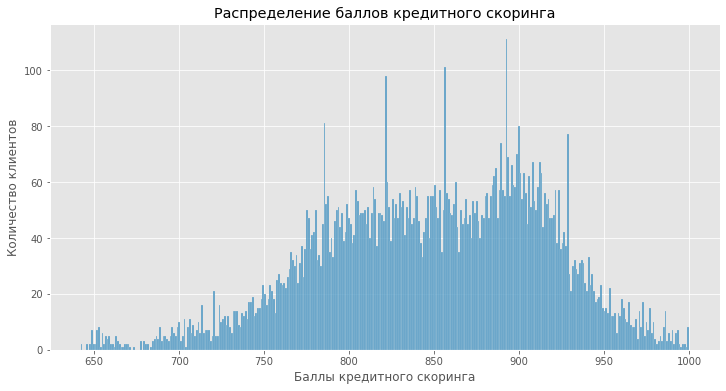

In [44]:
sns.histplot(data=df, x='score', bins=len(df['score'].unique()))
plt.title('Распределение баллов кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество клиентов')
plt.show()

Чаще всего кредитный скоринг находится в диапазоне от 775 до 925, у половины клиентов - от 800 до 900. Изучим взаимосвязь кредитного скоринга с наличием кредитной карты.

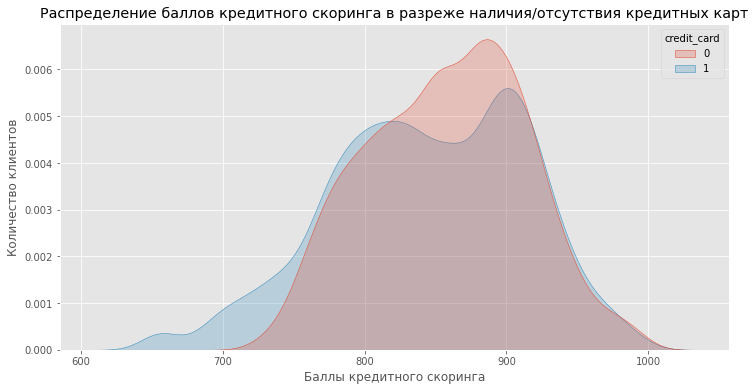

In [45]:
sns.kdeplot(data=df, x='score', hue='credit_card', common_norm=False, fill=True, alpha=0.25)
plt.title('Распределение баллов кредитного скоринга в разреже наличия/отсутствия кредитных карт')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество клиентов')
plt.show()

Интересно, что у большинства клиентов с минимальнымы значениями кредитного скоринга есть крединтые карты.


Изучем распределние возраста.

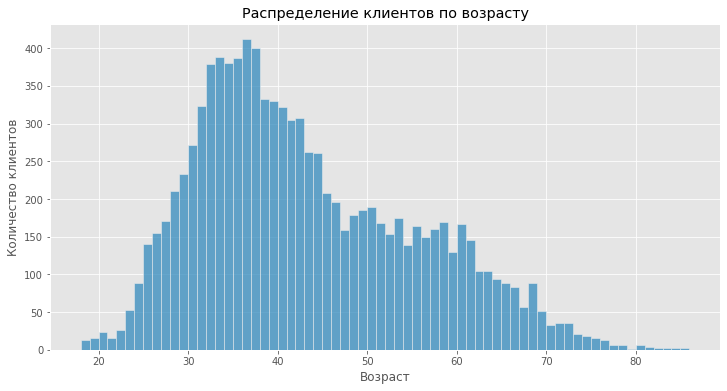

In [46]:
sns.histplot(df, x='age', bins=len(df['age'].unique()))
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

In [47]:
df['age'].describe()

count    9923.000000
mean       42.725184
std        12.171619
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

Больше всего клиентов 36 лет. Медианный возраст - 40 лет. Намного выше средного количества клиентов с 28 до 45 лет. Половина распределения клиентов попадает в диапазон от 33 до 51 года.

Узнаем количество клиентов по возрасту в гендерном разрезе.

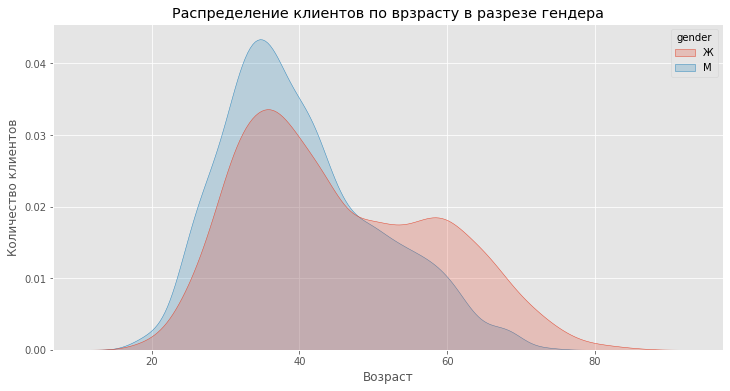

In [48]:
sns.kdeplot(data=df, x='age', hue='gender', common_norm=False, fill=True, alpha=0.25)
plt.title('Распределение клиентов по врзрасту в разрезе гендера')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

До 48 лет больше клиентов мужчин, после - наоборот.

Узнаем как распределен возраст относительно количесто используемых продуктов.

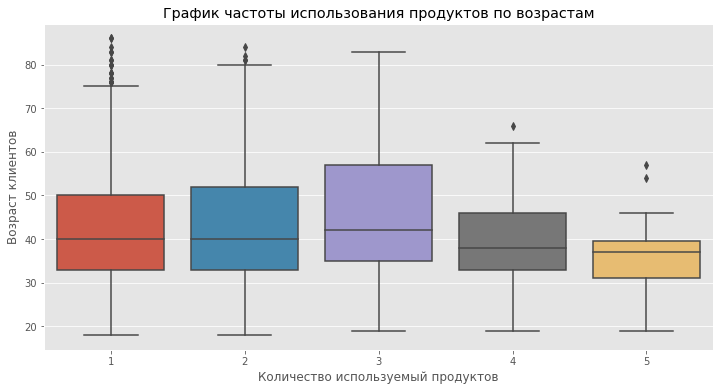

In [49]:
sns.boxplot(data = df, x='products', y='age')
plt.title('График частоты использования продуктов по возрастам')
plt.xlabel('Количество используемый продуктов')
plt.ylabel('Возраст клиентов')
plt.show()

Одним и двумя продуктами чаще всего пользуются люди ль 33 до 50-52 лет, медианный возраст - 40; Много выбросов после 75 лет;
Тремя продуктами чаще пользуются люди от 35 до 57 лет, медиана тоже немного выше - 42. Тремя продуктами могут пользоваться люди до 84 лет.
Четырьмя продуктами люди чаще пользуются от 33 до 46, медиана на уровне 38. Четырьмя продуктами, как правило, могут пользоваться люди до 62 лет.
Пятью продуктами пользуются люди от 31 до 40, медиана на уровне 37. Не считая пары выбросов, клиенты старше 37, в принципе, не пользуются пятью продуктами.

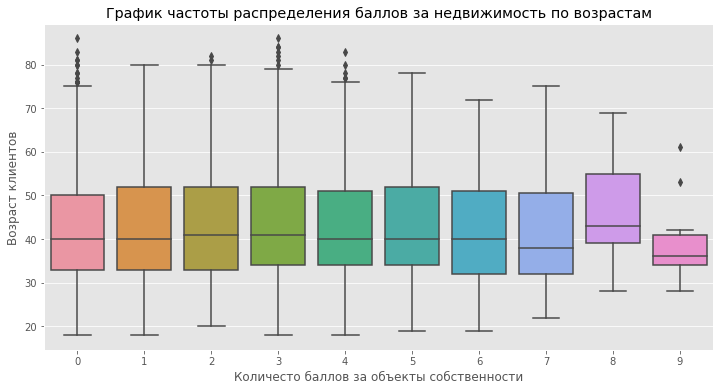

In [50]:
sns.boxplot(data = df, x='equity', y='age')
plt.title('График частоты распределения баллов за недвижимость по возрастам')
plt.xlabel('Количесто баллов за объекты собственности')
plt.ylabel('Возраст клиентов')
plt.show()

Наблюдается сильное отличие в распределении 8 и 9 баллов. Видимо, количество клиентов, получивших такой балл, сильно меньше.

Изучим, как распределены суммы баланса счетов.

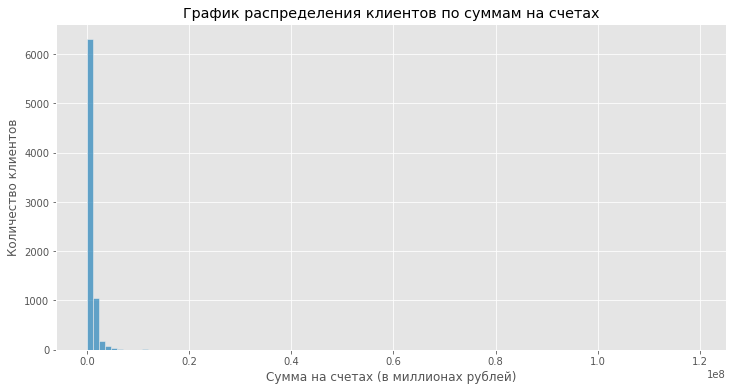

In [51]:
sns.histplot(df, x='balance', bins=100)
plt.title('График распределения клиентов по суммам на счетах')
plt.xlabel('Сумма на счетах (в миллионах рублей)')
plt.ylabel('Количество клиентов')
plt.show()

Есть клиенты, у которых на счетах лежит намного больше средтсв, чем у остальных. Это подтверждается графиком, а также тем, что среднее располагается сильно выше медианного значения. Рассмотрим ближе самые распространенные значения.

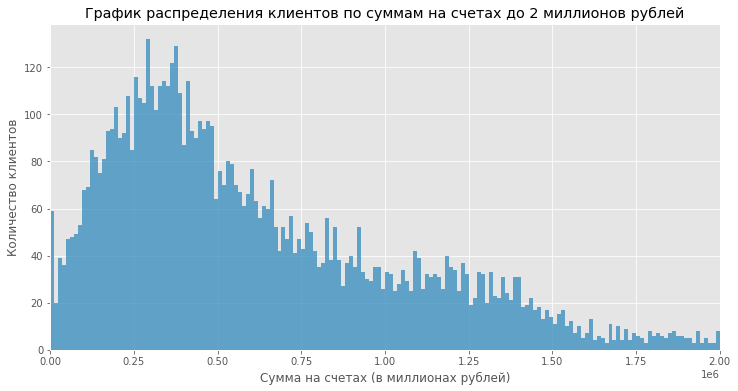

In [52]:
sns.histplot(df, x='balance', bins=10000)
plt.title('График распределения клиентов по суммам на счетах до 2 миллионов рублей')
plt.xlim(0,2000000)
plt.xlabel('Сумма на счетах (в миллионах рублей)')
plt.ylabel('Количество клиентов')
plt.show()

Пик распределения находится в районе 300 тысяч рублей, частые значения заканчиваются до 1,75 миллионов, медианное значение - около 524 тысяч рублей, а среднее еще выше - около 828 тысяч. Из чего можно сделать вывод, что в банке большое количество состоятельных клиентов которые тянут среднее вверх.

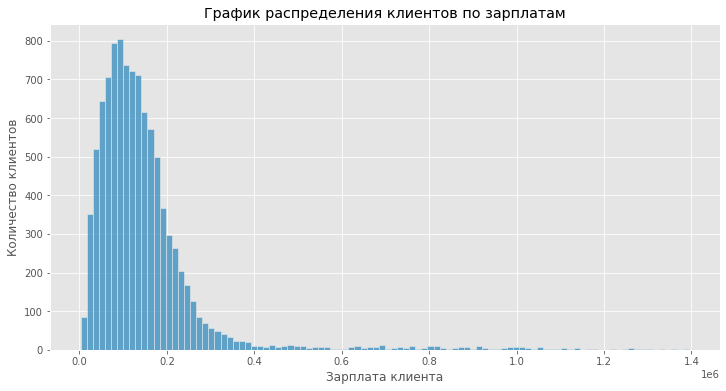

In [53]:
sns.histplot(df, x='est_salary', bins=100)
plt.title('График распределения клиентов по зарплатам')
plt.xlabel('Зарплата клиента')
plt.ylabel('Количество клиентов')
plt.show()

В зарплатах также присутствует большое количество клиентов, у которых зарплата сильно выше большинства остальных клиентов.

Медианная зарплата - 119 тысяч рублей. 4й квартиль начинается с зарплаты в 174 тысячи рублей.

Необходимо отдельно рассмотреть клиентов клиентов с большой суммой на счете или с крупной зарплатой. Обозначим данных клиентов как "vip".

Випами обозначим всех, у кого зарплата или сумма средств на счетах находятся в зоне выбросов относительно всего датасета (Q3 + 1.5(Q3 - Q1)

Вычислим границы баланса и заработной платы, при которых клиента нужно отнести к вип.

In [54]:
vip_sal_border = df['est_salary'].quantile(0.75) + 1.5*(df['est_salary'].quantile(0.75) - df['est_salary'].quantile(0.25))

In [55]:
vip_bal_border = df['balance'].quantile(0.75) + 1.5*(df['balance'].quantile(0.75) - df['balance'].quantile(0.25))

Создим отдельный признак, который будет отображать, попадает клиент в vip или нет.

In [56]:
vip_users = set(df.loc[(df['est_salary'] >= vip_sal_border) | (df['balance'] >= vip_bal_border), 'user_id' ])
df['is_vip'] = df['user_id'].isin(vip_users)

In [57]:
# подсчитаем, сколько випов
df.loc[df['is_vip'] == True]['user_id'].count()

786

Рассмотрим баланс счетов и зарплаты отдельно у вип и не вип клиетов

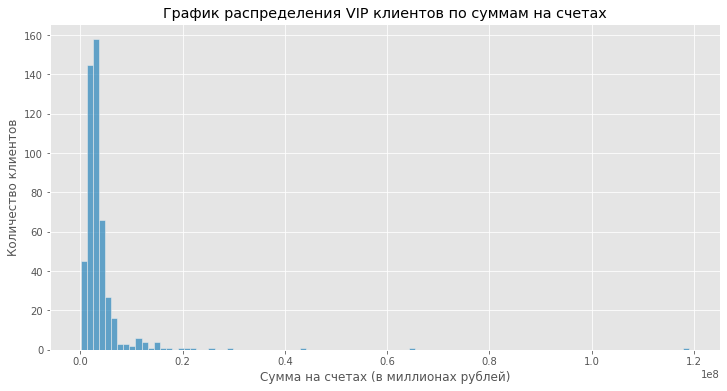

In [58]:
sns.histplot(df.loc[df['is_vip'] == True], x='balance', bins=100)
plt.title('График распределения VIP клиентов по суммам на счетах')
plt.xlabel('Сумма на счетах (в миллионах рублей)')
plt.ylabel('Количество клиентов')
plt.show()

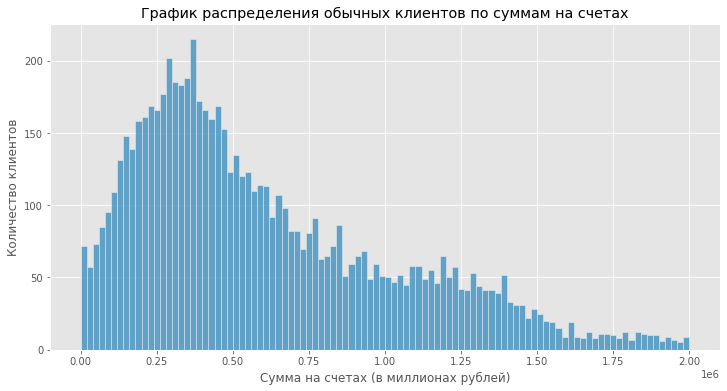

In [59]:
sns.histplot(df.loc[df['is_vip'] == False], x='balance', bins=100)
plt.title('График распределения обычных клиентов по суммам на счетах')
plt.xlabel('Сумма на счетах (в миллионах рублей)')
plt.ylabel('Количество клиентов')
plt.show()

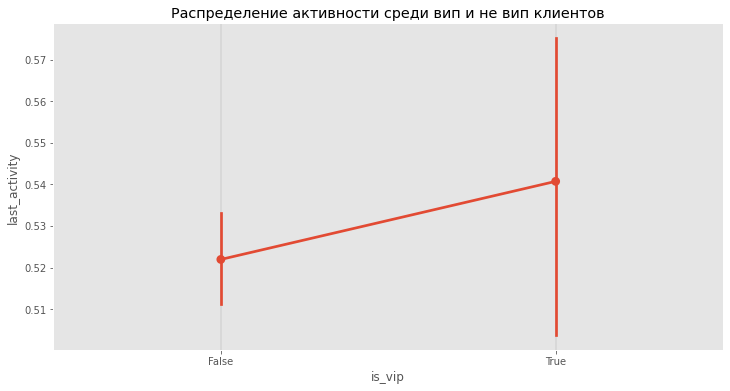

In [60]:
# узнаем распределение активности среди випов и не випов
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df, x='is_vip', y='last_activity', ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title('Распределение активности среди вип и не вип клиентов');

Активность среди вип клиентов немного выше

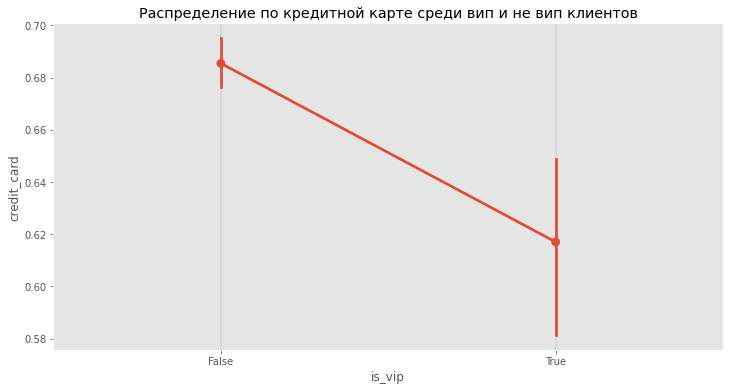

In [61]:
# распределение по кредитной карте среди вип и не вип клиентов
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df, x='is_vip', y='credit_card', ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title('Распределение по кредитной карте среди вип и не вип клиентов');

Среди обычных клиентов доля тех, кто пользуется кредитной картов выше.

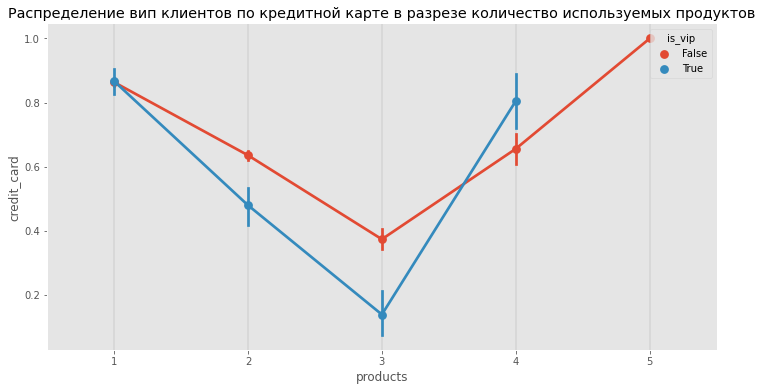

In [62]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df, x='products', y='credit_card', hue='is_vip', ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title('Распределение вип клиентов по кредитной карте в разрезе количество используемых продуктов');

У подавляющего большинства всех клиентов, пользующихся одним продуктом, данным продуктом является кредитная карта.
Среди всех клиентов, меньше всего пользуются кредитками те, у кого три продукта банка.

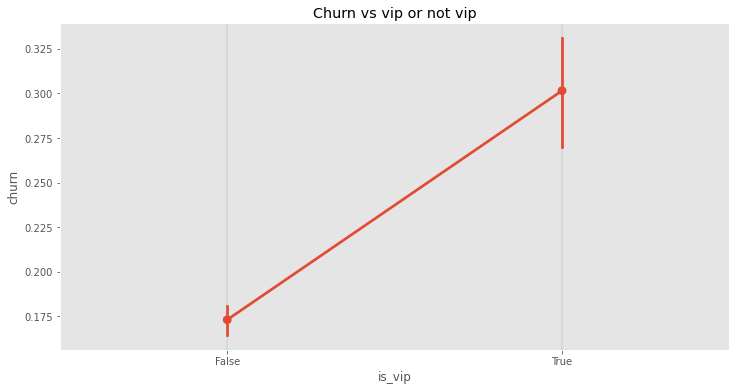

In [63]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.pointplot(data=df, x='is_vip', y='churn', ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title("Churn vs vip or not vip");

### Предварительные выводы: ###
- В банке большое количество клиентов, которые имеют высокую заработную плату или большую сумму на счете; данных клиентов нужно рассматривать отдельно.
- Чаще всего кредитный скоринг находится в диапазоне от 775 до 925, у половины клиентов - от 800 до 900. Интересно, что у большинства клиентов с минимальнымы значениями кредитного скоринга есть крединтые карты.
- Больше всего клиентов 36 лет. Медианный возраст - 40 лет. Намного выше средного количества клиентов с 28 до 45 лет. Половина распределения клиентов попадает в диапазон от 33 до 51 года. До 48 лет больше клиентов мужчин, после - наоборот.
- Одним и двумя продуктами чаще всего пользуются люди ль 33 до 50-52 лет, медианный возраст - 40; Много выбросов после 75 лет; Тремя продуктами чаще пользуются люди от 35 до 57 лет, медиана тоже немного выше - 42. Тремя продуктами могут пользоваться люди до 84 лет. Четырьмя продуктами люди чаще пользуются от 33 до 46, медиана на уровне 38. Четырьмя продуктами, как правило, могут пользоваться люди до 62 лет. Пятью продуктами пользуются люди от 31 до 40, медиана на уровне 37. Не считая пары выбросов, клиенты старше 37, в принципе, не пользуются пятью продуктами. 
- Больше всего обычных клиентов пользуются двумя продуктами - около 5 000. Следом идут клиенты с 1м продуктом - их около 3 000. Подавляющее число клиентов, пользующихся одним продуктом банка, имеют кредитную карту (более 5/6). Более 3/5 клиентов, пользующихся двумя продуктами банка, имеют кредитную карту. Большинство клиентов с тремя продуктами не используют кредитную карту. Около 2/3 клиентов с 4 продуктами имеют кредитную карту. Клиенты с 5ю продуктами имеют кредитные карты.
- vip плиенты не пользуются пятью продуктами банка, но, в целом, пропорция распределения схожа с обычными клиентами.
- Подавляющее большинство вип клиентов с одним продуктом пользуется именно кредитной картой. А вот более половины клиентов с двумя продуктами обходятся без кредитной карты. Как и клиенты с тремя продуктами - подавляющее большинство не пользуются кредитной картой. С четырьмы продуктами - наоборот.
- Чуть меньше половины как обычных, так и вип клиентов неактивны.
- Среди вип клиентов отток сильно выше, чем среди обычных клиентов.

\
\
\
Для построения сегментации будет правильным разделить клиентов на категории по непрерывным параметрам: кредитный скоринг, возраст, баланс и зарплата. Разделение на категории поможет четче выделить приоритетные для изучения группы.

Для этого нужно еще раз посмотреть на распределение показателей по данным параметрам.

Начнем с возраста.

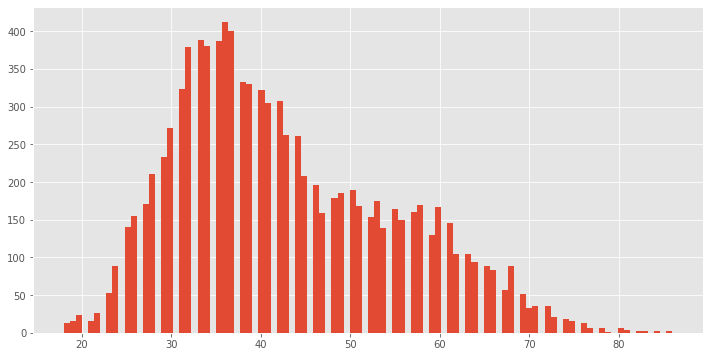

In [66]:
df['age'].hist(bins=100);

Кажется верным разделить на группы по 15 лет:
- до 30 (стадия роста количество клиентов с их возрастом) - стадия, когда люди выбирают банк и нужно привлекать клиентов именно к нам,
- 30-44 (пик количества клиентов) - стадия, когда больше всего людей пользуются услугами банка, отток в этом сегменте может быть самым болезненным.
- 45-59 (количество клиентов выходит на плато) - клиенты, которым стабильно нужны какие-то банковские услуги)
- 60-74 (быстрый спад количества клиентов) - подстроение под новые потребности
- от 75 (редкие клиенты)

In [67]:
df.loc[(df['age'] < 30), 'age_g'] = 1
df.loc[(df['age'] >= 30) &
       (df['age'] < 45), 'age_g'] = 2
df.loc[(df['age'] >= 45) &
       (df['age'] < 60), 'age_g'] = 3
df.loc[(df['age'] >= 60) &
       (df['age'] < 75), 'age_g'] = 4
df.loc[(df['age'] >= 75), 'age_g'] = 5

Теперь работаем с кредитным скорингом.

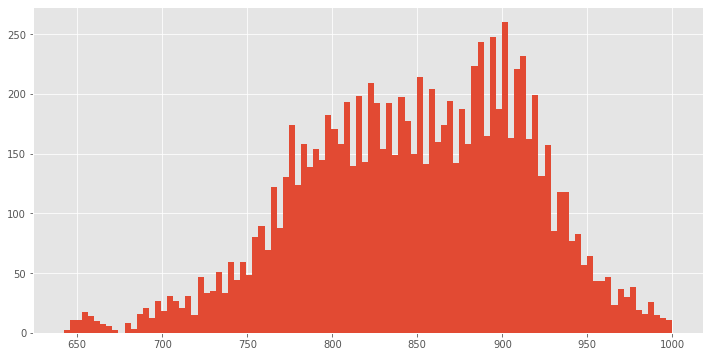

In [71]:
df['score'].hist(bins=100);

Кажется правильным разделить на кредитный скоринг на 4 одинаковых отрезка:
- клиенты с низким скорингом (таких не очень много)
- первая половина клиентов с распространенными средними значениями скоринга
- вторая половмина клиентов с распространенныси рейтингами выше среднего
- с высоким скорингом.

In [72]:
# разделим на 4 развых по диапазону сегмента, обозначим их от 1 до 4
labels_score = [1, 2, 3, 4]
df['score_g'] = pd.cut(df['score'], bins=4, labels=labels_score)

Переходим к балансу. Випы по балансу имеют от 2х миллионов на счету. Рассмотрим на сколько частей имеет смысл делить обычных клиентов.

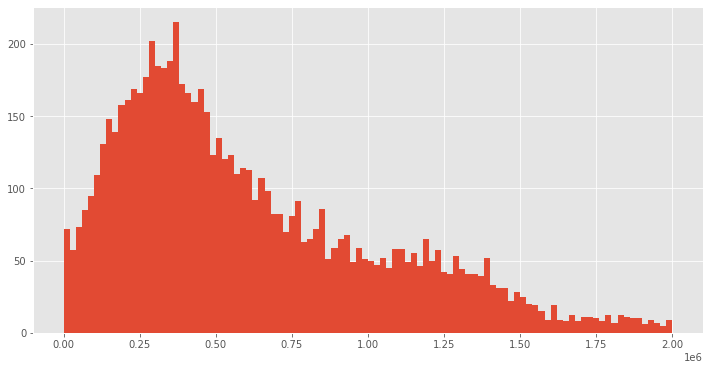

In [73]:
df.loc[df['is_vip'] == False, 'balance'].hist(bins=100);

Кажется логичным поделить по 250 тысяч, получается 8 частей. Всех, у кого на счету больше двух миллионов добавим в категорию 2000000. Всех, у кого пропуски вместо данных, дадим -1.

In [74]:
df['balance'].isna()

0       False
1       False
2        True
3       False
4       False
        ...  
9918    False
9919     True
9920     True
9921    False
9922    False
Name: balance, Length: 9923, dtype: bool

In [75]:
df['balance_g'] = df['balance'] // 250000 * 250000

df.loc[df['balance'] >= 2000000, 'balance_g'] = 2000000

In [76]:
df['balance_g'].value_counts()

250000.0     2201
0.0          1475
500000.0     1296
750000.0      826
1000000.0     665
1250000.0     483
2000000.0     427
1500000.0     174
1750000.0     117
Name: balance_g, dtype: int64

Осталась заработная плата.

<AxesSubplot:>

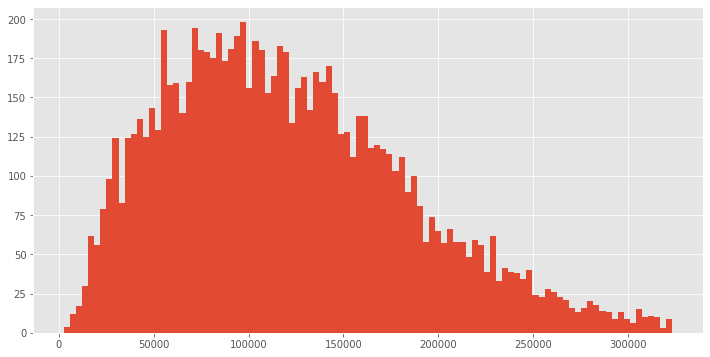

In [77]:
df.loc[df['is_vip'] == False, 'est_salary'].hist(bins=100)

In [78]:
df.loc[df['is_vip'] == False, 'est_salary'].max()

323502.28

Разделим на сегменты по 50 тысяч.

In [79]:
df['est_salary_g'] = df['est_salary'] // 50000 * 50000

df.loc[df['est_salary'] > 350000, 'est_salary_g'] = 400000

In [80]:
df['est_salary_g'].value_counts()

50000.0     2710
100000.0    2558
150000.0    1722
0.0         1192
200000.0     847
400000.0     409
250000.0     333
300000.0     152
Name: est_salary_g, dtype: int64

Теперь проводим исследование признаков и их диапазонов в разрезе оттока.

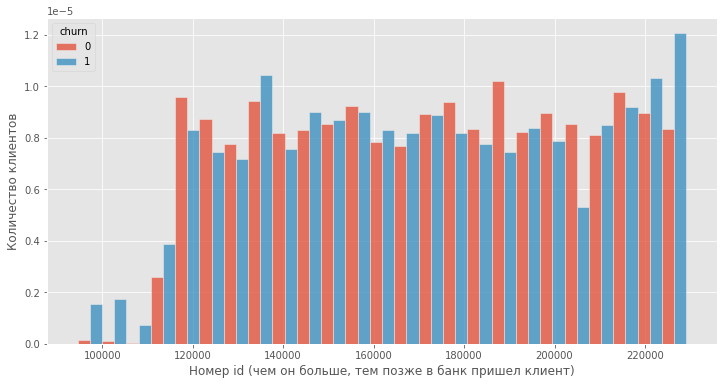

In [81]:
sns.histplot(data=df, x='user_id', hue='churn', common_norm=False, stat='density', multiple='dodge')
plt.xlabel('Номер id (чем он больше, тем позже в банк пришел клиент)')
plt.ylabel('Количество клиентов')
plt.show()

В последнее время отток новых клиентов увеличивается.

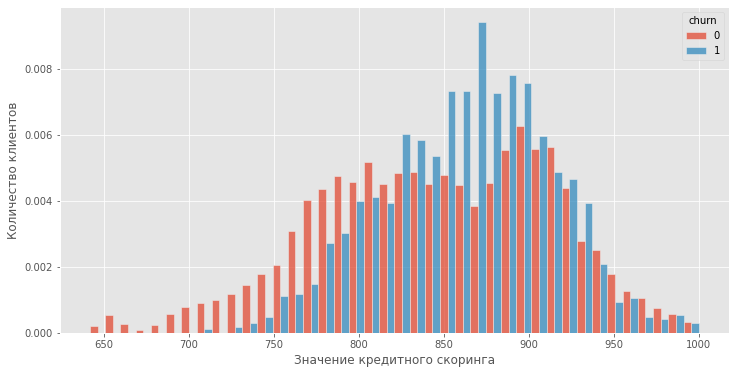

In [82]:
sns.histplot(data=df, x='score', hue='churn', common_norm=False, stat='density', multiple='dodge')
plt.xlabel('Значение кредитного скоринга')
plt.ylabel('Количество клиентов')
plt.show()

До, примерно, 825 больше тех, кто не уходит из банка.
С средитным скорингом от 825 до, примерно, 910 намного больше тех, кто уходит из банка.

Изучим возраст.

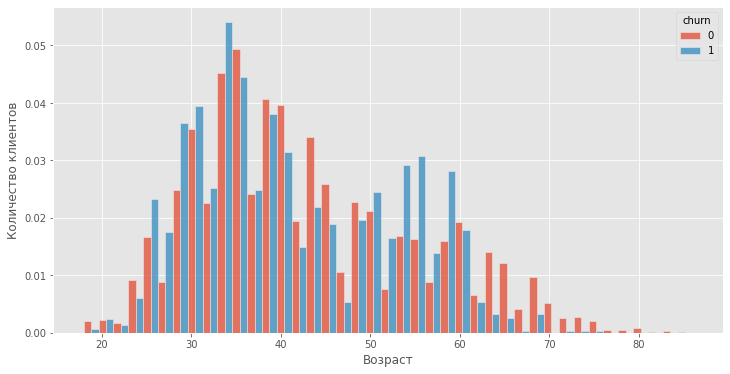

In [83]:
sns.histplot(data=df, x='age', hue='churn', common_norm=False, stat='density', multiple='dodge')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Больше всего банк теряет пользователей от 50 до 60 лет.

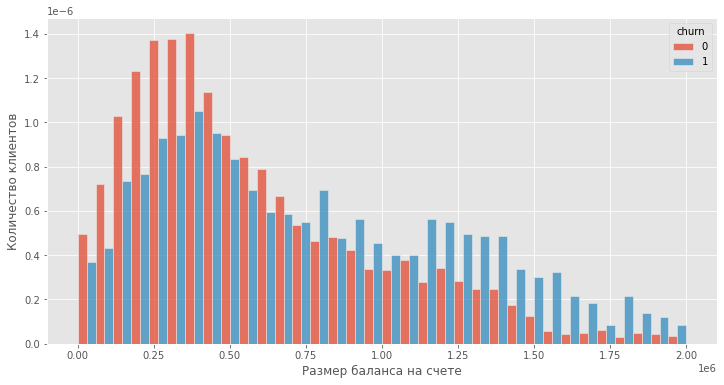

In [84]:
sns.histplot(data=df.loc[df['is_vip'] == False], x='balance', hue='churn', common_norm=False, stat='density', multiple='dodge')
plt.xlabel('Размер баланса на счете')
plt.ylabel('Количество клиентов')
plt.show()

Самыми лояльными являются клиенты с балансом до 400 тысяч. Клиенты с сумой на счете более 750 тысяч уходят чаще.

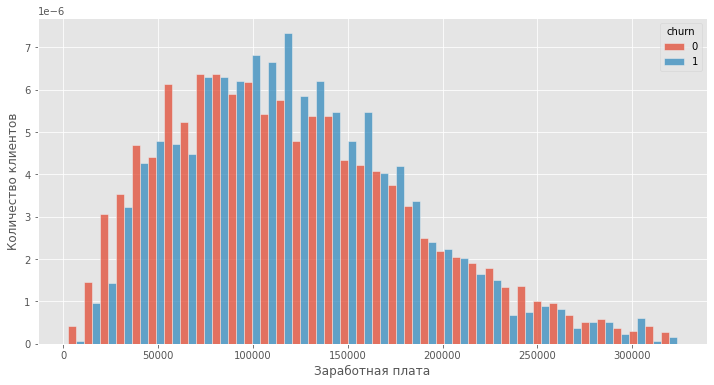

In [85]:
sns.histplot(data=df.loc[df['is_vip'] == False], x='est_salary', hue='churn', common_norm=False, stat='density', multiple='dodge')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
plt.show()

Чаще уходят клиенты с зарплатой от 100 до 175 тыяч.

Напишем функцию, которая будет визуализировать распределение для любого дискретного параметра

In [86]:
def dis_param(param, name):
    fig, ax = plt.subplots( figsize=(12, 6))
    sns.despine(left=False, ax=ax)
    sns.pointplot(data=df, x=param, y='churn', ax=ax)
    ax.grid( color='grey', lw=0.25)
    ax.set_title(name)

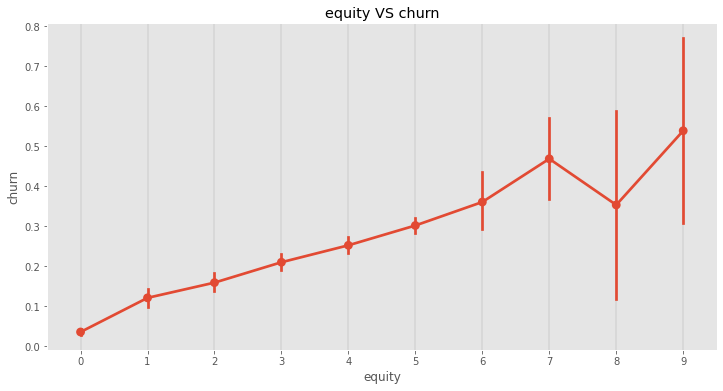

In [88]:
dis_param('equity', 'equity VS churn')

Чем больше недвижимости, тем больший процент клиентов уходят.

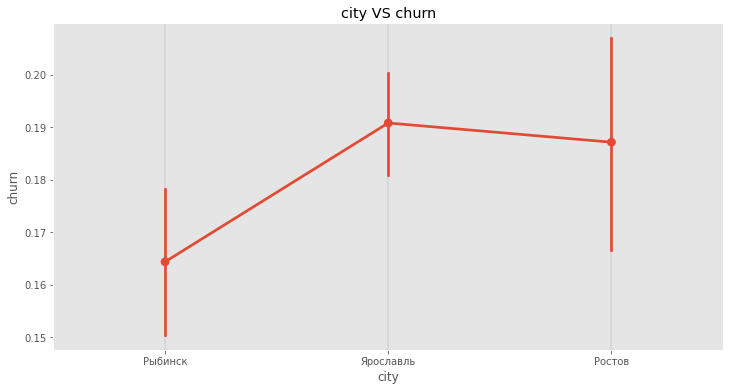

In [89]:
dis_param('city', 'city VS churn')

Более лояльны клиенты в Рыбинске.

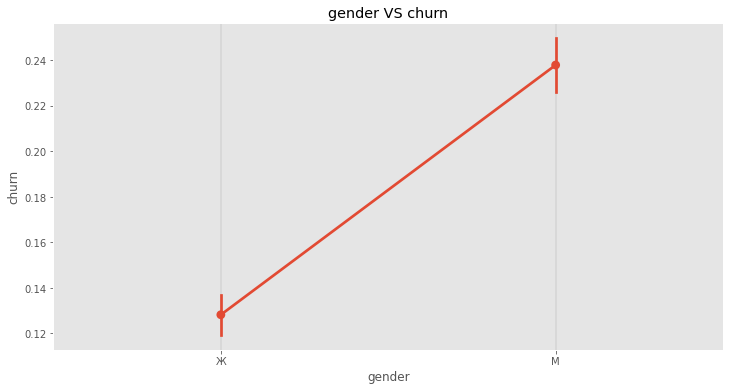

In [90]:
dis_param('gender', 'gender VS churn')

Мужчины уходят в два раза чаще.

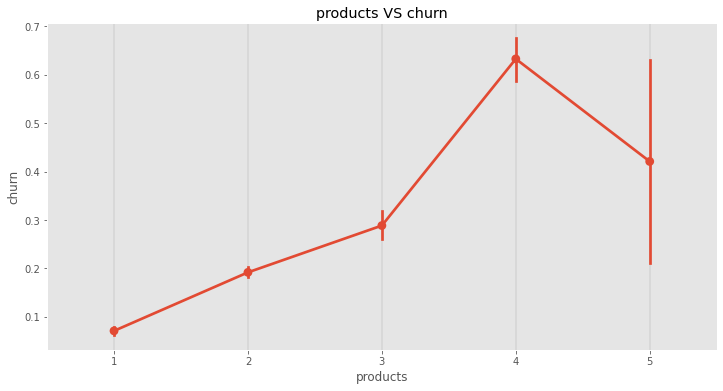

In [91]:
dis_param('products', 'products VS churn')

С увеличением количества используемых продуктов, увеличивается отток. Особенно высокий отток у клиентов с 4мя продуктами.

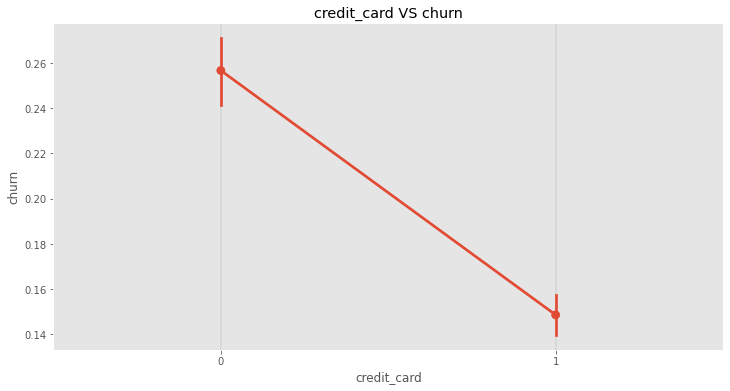

In [92]:
dis_param('credit_card', 'credit_card VS churn')

Клиенты без кредитной карты уходят чаще.

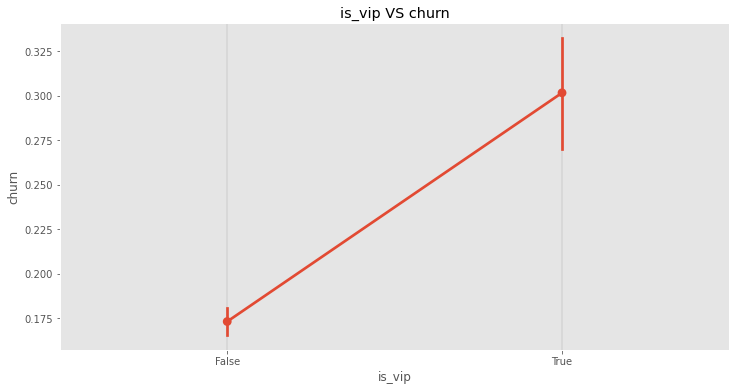

In [93]:
dis_param('is_vip', 'is_vip VS churn')

Среди вип клиентов отток намного выше.

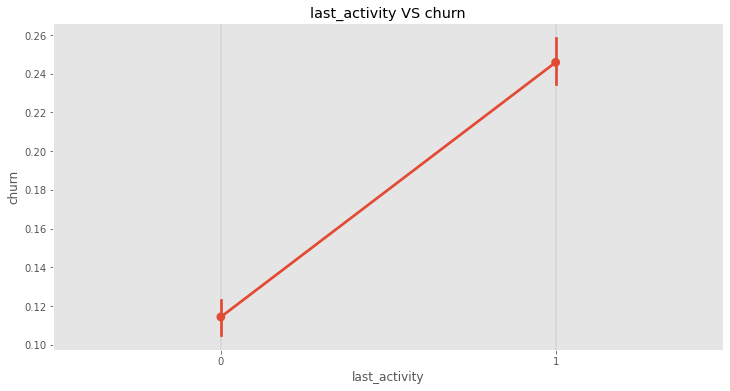

In [94]:
dis_param('last_activity', 'last_activity VS churn')

Чаще уходят активные клиенты.

Теперь изучим параметры, разбитые на группы.

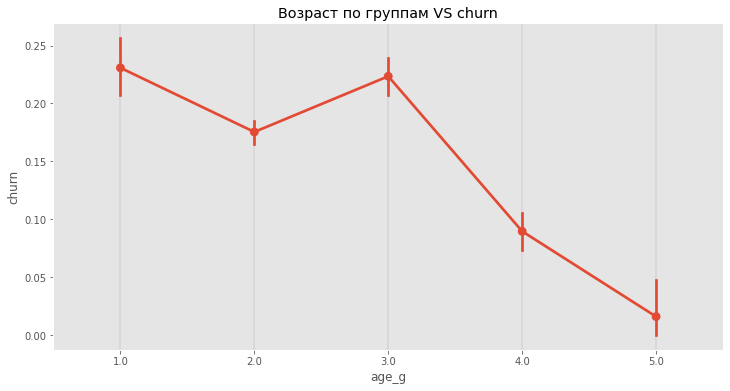

In [95]:
dis_param('age_g', 'Возраст по группам VS churn')

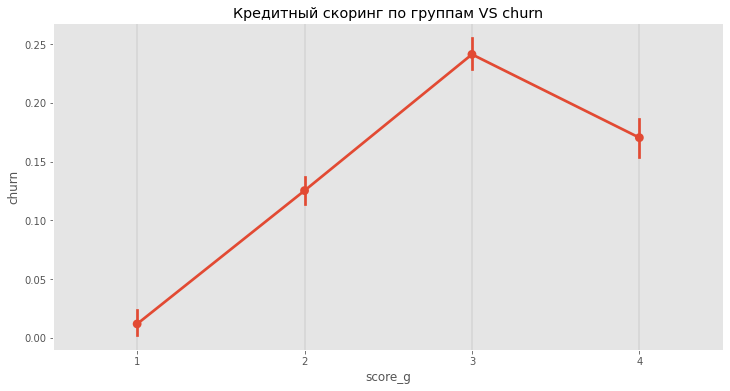

In [96]:
dis_param('score_g', 'Кредитный скоринг по группам VS churn')

Больше всего клиентов уходит с кредитным скорингом выше среднего.

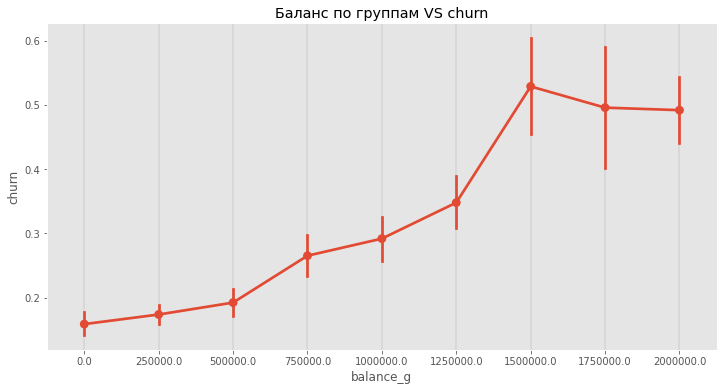

In [97]:
dis_param('balance_g', 'Баланс по группам VS churn')

Отток среди клиентов, имеющих на счете от полутора миллионов намного выше.

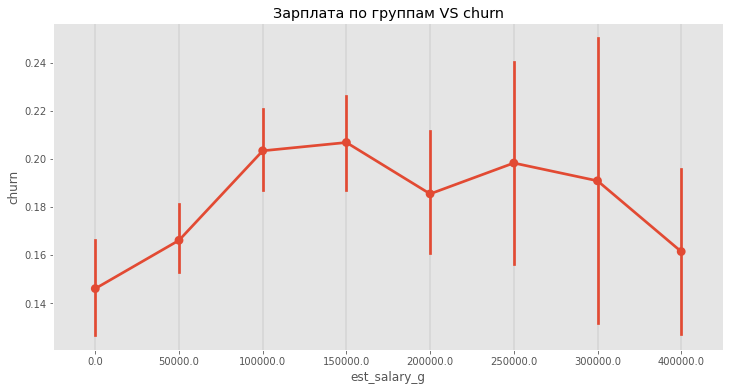

In [98]:
dis_param('est_salary_g', 'Зарплата по группам VS churn')

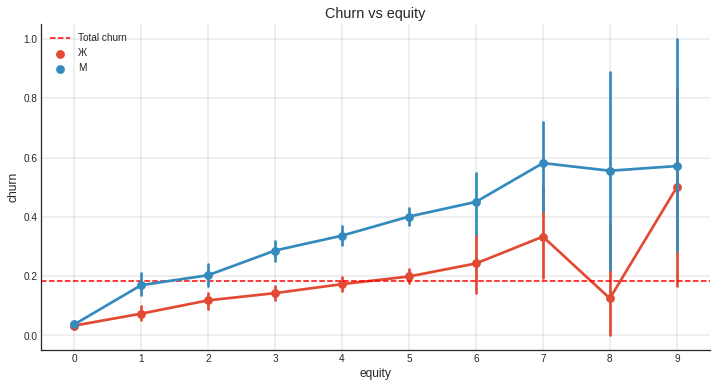

In [99]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)

# add hor line with total churn
ax.axhline(df['churn'].mean(), ls='--', c='r', label='Total churn')

sns.pointplot(data=df, x='equity', y='churn', hue='gender', ax=ax)
ax.grid( color='grey', lw=0.25)
ax.set_title("Churn vs equity")
ax.legend()
plt.show()

plt.style.use('ggplot')

Теперь изучим с помощью тепловой карты отток клиентов в разрезе количества использованных продуктов.

In [102]:
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,rostov,ribinsk,iaroslavl,woman,man,is_vip,age_g,score_g,balance_g,est_salary_g
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,1,0,1,0,False,1.0,3,0.0,50000.0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,0,1,0,False,2.0,3,750000.0,50000.0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,1,0,1,0,False,2.0,3,NaN,100000.0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,0,1,1,0,False,3.0,3,1500000.0,150000.0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,0,0,1,0,1,False,2.0,1,0.0,50000.0


In [103]:
# список параметров для изучения
param_columns = ['city', 'gender', 'equity', 'credit_card', 'last_activity', 'is_vip', 'score_g', 'age_g', 'balance_g', 'est_salary_g']

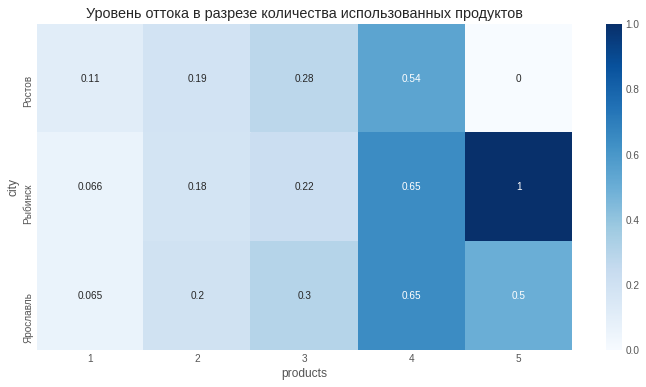

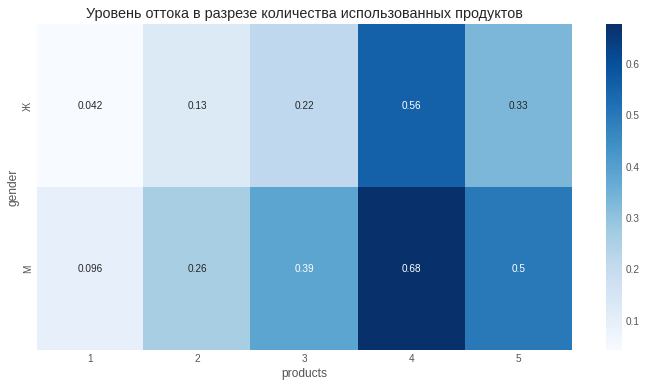

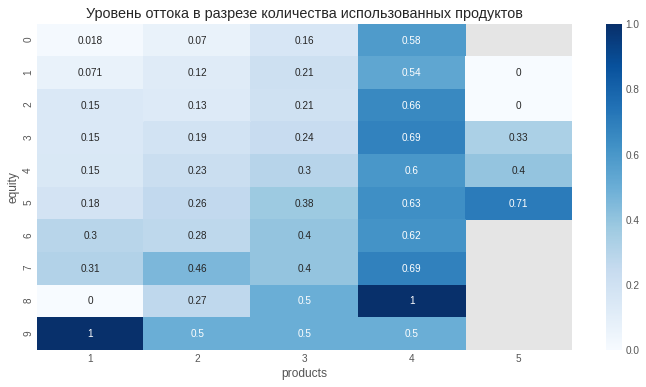

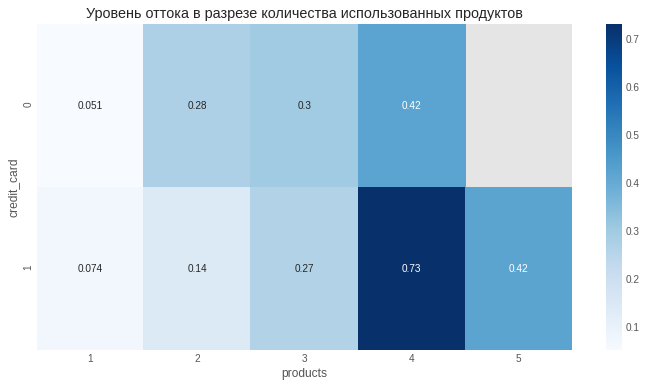

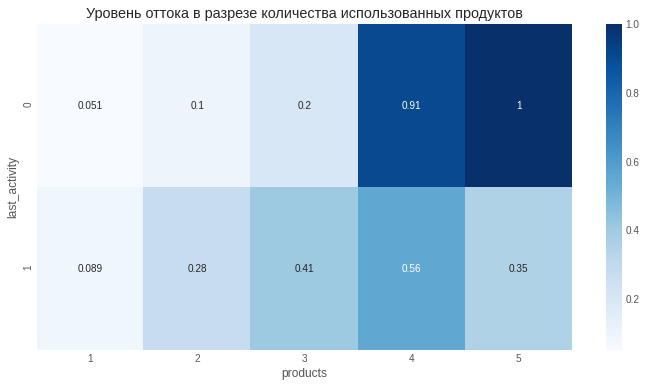

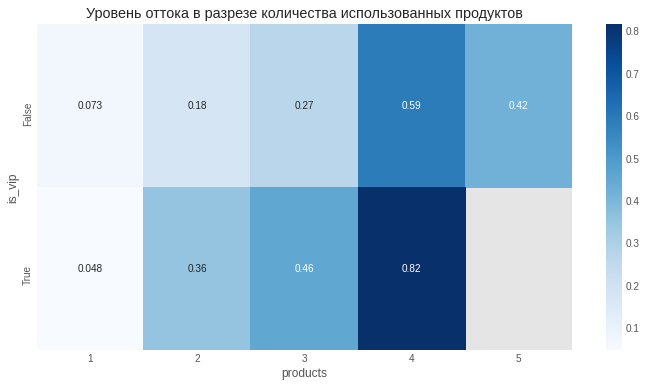

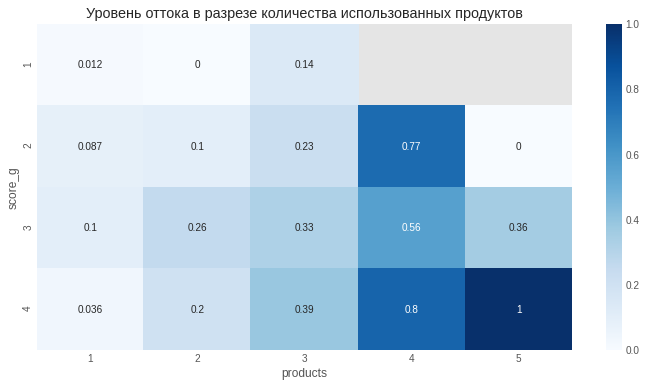

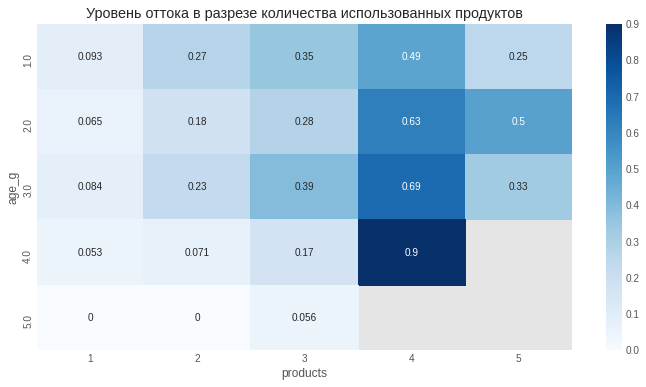

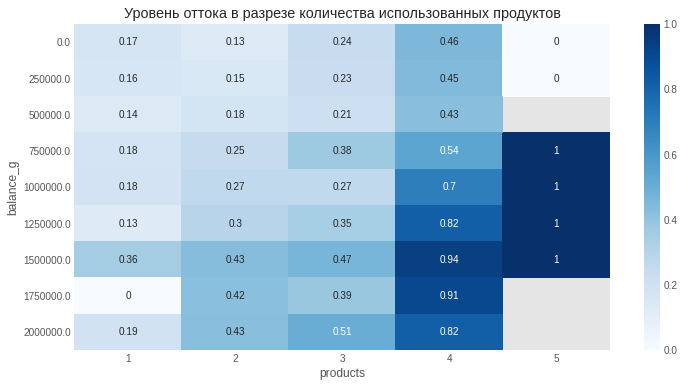

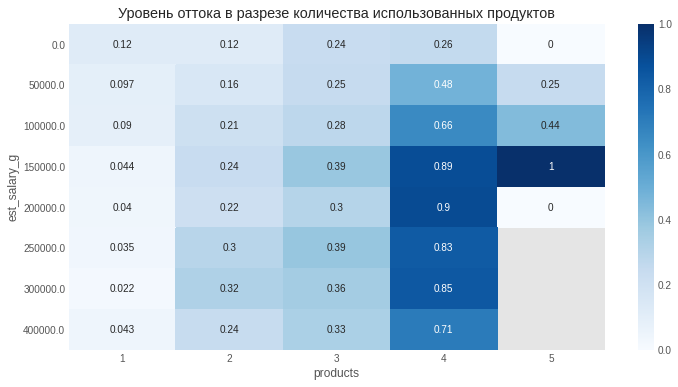

In [104]:
for i in param_columns:
    sns.heatmap(df.pivot_table(index=i, columns='products', values='churn', aggfunc='mean'), cmap='Blues', annot=True)
    plt.title('Уровень оттока в разрезе количества использованных продуктов')
    plt.show()

<a id="step4_conc"></a>
## [Выводы по главе 4](#content) ##

- В банке большое количество клиентов, которые имеют высокую заработную плату или большую сумму на счете; данные клиенты получили дополнительный параметр is_vip.
- Чаще всего кредитный скоринг находится в диапазоне от 775 до 925, у половины клиентов - от 800 до 900. Интересно, что у большинства клиентов с минимальнымы значениями кредитного скоринга есть крединтые карты.
- Больше всего клиентов 36 лет. Медианный возраст - 40 лет. Намного выше средного количества клиентов людей с 28 до 45 лет. Половина распределения клиентов попадает в диапазон от 33 до 51 года. До 48 лет больше клиентов мужчин, после - наоборот.
- Одним и двумя продуктами чаще всего пользуются люди ль 33 до 50-52 лет, медианный возраст - 40; Много выбросов после 75 лет; Тремя продуктами чаще пользуются люди от 35 до 57 лет, медиана тоже немного выше - 42. Тремя продуктами могут пользоваться люди до 84 лет. Четырьмя продуктами люди чаще пользуются от 33 до 46, медиана на уровне 38. Четырьмя продуктами, как правило, могут пользоваться люди до 62 лет. Пятью продуктами пользуются люди от 31 до 40, медиана на уровне 37. Не считая пары выбросов, клиенты старше 37, в принципе, не пользуются пятью продуктами. 
- Больше всего обычных клиентов пользуются двумя продуктами - около 5 000. Следом идут клиенты с 1м продуктом - их около 3 000. Подавляющее число клиентов, пользующихся одним продуктом банка, имеют кредитную карту (более 5/6). Более 3/5 клиентов, пользующихся двумя продуктами банка, имеют кредитную карту. Большинство клиентов с тремя продуктами не используют кредитную карту. Около 2/3 клиентов с 4 продуктами имеют кредитную карту. Клиенты с 5ю продуктами имеют кредитные карты.
- vip плиенты не пользуются пятью продуктами банка, но, в целом, пропорция распределения схожа с обычными клиентами.
- Подавляющее большинство вип клиентов с одним продуктом пользуется именно кредитной картой. А вот более половины клиентов с двумя продуктами обходятся без кредитной карты. Как и клиенты с тремя продуктами - подавляющее большинство не пользуются кредитной картой. С четырьмы продуктами - наоборот.
- Чуть меньше половины как обычных, так и вип клиентов неактивны.


В разрезе оттока:
- Отток новых клиентов растет.
- До, примерно, 825 баллов кредитного скоринга больше тех, кто не уходит из банка. С кредитным скорингом от 825 до, примерно, 910 намного больше тех, кто уходит из банка (скоринг выше среднего).
- Больше всего банк теряет пользователей от 50 до 60 лет.
- Самыми лояльными являются клиенты с балансом до 400 тысяч. Клиенты с сумой на счете более 750 тысяч уходят чаще. Самый большой отток среди клиентов, имеющих на счете от полутора миллионов.
- Чаще уходят клиенты с зарплатой от 100 до 175 тыяч. лиенты с заработной платой до 100 тысяч рублей более лояльны к банку
- Чем больше недвижимости, тем больший процент клиентов уходят.
- Более лояльны клиенты в Рыбинске.
- Мужчины уходят в два раза чаще.
- С увеличением количества используемых продуктов, увеличивается отток. Особенно высокий отток у клиентов с 4мя продуктами.
- Клиенты без кредитной карты уходят чаще.
- Среди вип клиентов отток намного выше.
- Чаще уходят активные клиенты.

В разрезе оттока по количеству используемых продуктов чаще уходят:
- мужчины от 3х продуктов, женщины от 4х;
- с недвижимостью и высоким скорингом или при любом количестве недвижимосити, если пользуются 4мя продуктами;
- с кредитной картой и 4мя продуктами;
- неактивные клиенты с 4мя продуктами или активные от 3х;
- отток у випов выше при любом количестве используемых продуктов;
- самый большой отток у клиентов с 60 по 75 лет с 4мя продуктами.
- с балансом от 750 тысяч и 4мя продуктами;
- с зарплатой от 100 тысяч и также 4мя продуктами.

<a id="step5"></a>
## [Глава 5. Проверка статистических гипотез](#content) ##

В виде статистического теста для проверки взаимосвязей параметров будет использоваться phik тест, так как он умеет устанавливать нелинейные зависимости.

Для проверки гипотез будет использоваться тест Манна-Уитни.

Сначала проверяем взаимосвять всех параметров друг с другом.

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'rostov', 'ribinsk', 'iaroslavl', 'woman', 'man', 'age_g', 'balance_g', 'est_salary_g']


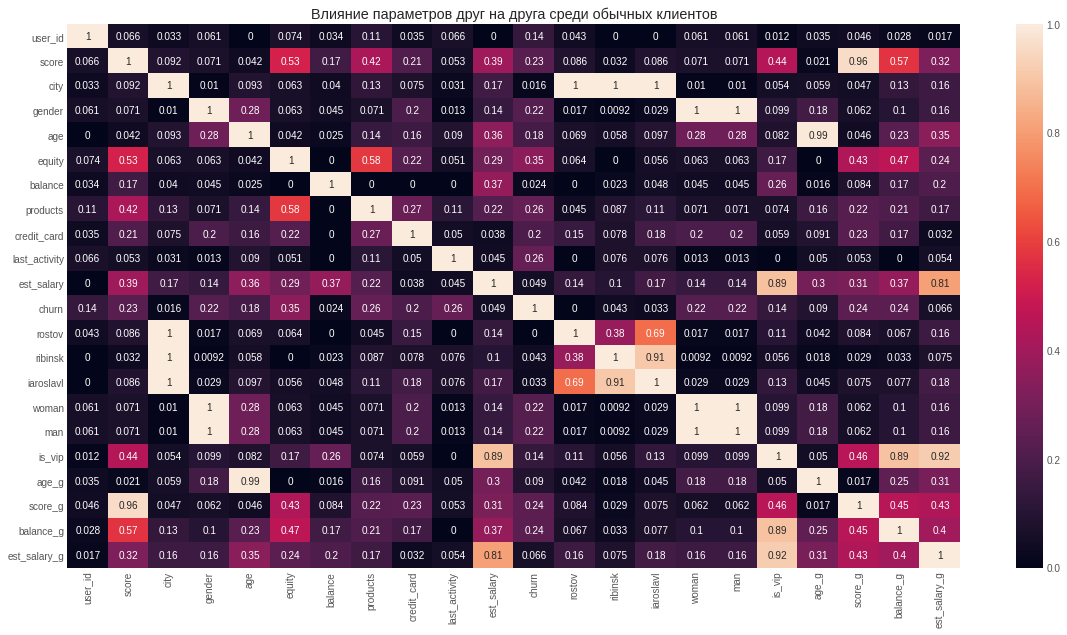

In [105]:
plt.figure(figsize=(20,10))
sns.heatmap(data = df.phik_matrix(), annot=True)
plt.title('Влияние параметров друг на друга среди обычных клиентов')
plt.show()

Самая большая кореляция у оттока имеется с недвижимости (0,35). Также есть кореляция с количеством продукта и активностью клиента (0,26). Только после этого со скорингом (0,23) и гендером (0,22).

Это дополнительно подтверждает, что именно с изменением этим параметрав, больше всего менялся отток клиентов. Так, при equity равным нулем, отток порядка 5 процентов, постоянно растет при увеличении недвижимости и составляет более половины при показателе недвижимости в 9 баллов.

Первые 10 влияющих факторов по phik показаны ниже

In [106]:
df.phik_matrix()['churn'].sort_values(ascending=False)[1:10]

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'rostov', 'ribinsk', 'iaroslavl', 'woman', 'man', 'age_g', 'balance_g', 'est_salary_g']


equity           0.352230
last_activity    0.262629
products         0.260021
score_g          0.241156
balance_g        0.238080
score            0.228265
woman            0.220049
gender           0.220049
man              0.220049
Name: churn, dtype: float64

Из выводов пред раздела, влияющими признаками являются:
- баланс
- equity
- некоторые диапазоны возраста
- пол (мужчины)
- кол-во продуктов
- кредитка
- активность

Как можно заметить, списки влияющих факторов сильно схожи (если не сказать, что совпадают полностью) - это является подтверждением того, что анализ выполнен корректно👌

**Теперь проверяем гипотезы.**

Первой гипотезой проверим статистическую гипотезу различия возраста между теми клиентами (отдельноко среди обычных и отдельно среди вип), которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Так как количество данных клиентов различается, будем использовать критерий Манна-Уитни.

Н0: у клиентов, которые пользуются двумя продуктами банка и теми, которые пользуются одним продуктом одинаковый возраст. \
Н1: у клиентов, которые пользуются двумя продуктами банка и теми, которые пользуются одним продуктом разный возраст.

В первую выборку пойдут все обычные клиенты, пользующиеся одним продуктом, по вторую - двумя продуктами.

In [107]:
data1 = df.loc[df['products'] == 1]['age']
data2 = df.loc[df['products'] == 2]['age']

Уровень статистической значимости будет 0.05

In [108]:
alpha = 0.05

In [109]:
results = st.mannwhitneyu(data1, data2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Вывод о различии сделать нельзя')

p-значение:  0.07199156599101543
Вывод о различии сделать нельзя


Со статистической значимостью в 0.05 нельзя утвержать, что разница в возрасте среди клиентов, пользующихся одним и двумя продуктами есть.

Второй гипотезой проверим различие наличие различия значений кредитного скоринга среди клиентов, также пользующихся одним и двумя продуктами.

Н0: у клиентов, которые пользуются двумя продуктами банка и теми, которые пользуются одним продуктом одинаковый кредитный скоринг. \
Н1: у клиентов, которые пользуются двумя продуктами банка и теми, которые пользуются одним продуктом разное значение кредитного скоринга.

In [110]:
data1 = df.loc[df['products'] == 1]['score']
data2 = df.loc[df['products'] == 2]['score']

alpha = 0.05

results = st.mannwhitneyu(data1, data2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Вывод о различии сделать нельзя')

p-значение:  2.6659093301800576e-32
Отвергаем нулевую гипотезу: разница статистически значима


Среди клиентов есть разница в значениях кредитного скоринга среди клиентов, пользующихся одним и двумя продуктами банка.

<a id="step5_conc"></a>
## [Выводы по главе 5](#content) ##
1. Самая большая кореляция у оттока имеется с недвижимости (0,35). Также есть кореляция с количеством продукта и активностью клиента (0,26). Только после этого со скорингом (0,23) и гендером (0,22). Это дополнительно подтверждает, что именно с изменением этим параметрав, больше всего менялся отток клиентов. Так, при equity равным нулем, отток порядка 5 процентов, постоянно растет при увеличении недвижимости и составляет более половины при показателе недвижимости в 9 баллов.

2. Не смогли опровергнуть гипотезу о равенстве возрастов среди клиентов, пользующимися 1м и 2мя продуктами.
3. Опровергли гипотезу о равенстве кредитного скоринга среди клиентов, пользующимися 1м и 2мя продуктами. Кредитные скоринги различны.

<a id="step6"></a>
## [Сегментация пользователей](#content) ##

Исходя из всех проведенных выше исследований можно выделить несколько групп, которые представляют наибольший интерес в разрезе оттока.

Сегментом **1** будут:
- VIP клиенты;
- мужчины;
- использующие от трех продуктов.


Сегментом **2** будет:
- пользующиеся 4м продуктами;
- возраст от 40 до 60;
- имеют кредитную карту.

Создадим отдельные датафреймы под каждый сегмент и узнаем основные характеристики.

In [111]:
seg_1 = df.query('gender=="М" & products>=3 & is_vip==True')

In [112]:
seg_1.shape

(111, 22)

In [113]:
seg_1['churn'].value_counts()

1    82
0    29
Name: churn, dtype: int64

In [114]:
seg_1.loc[seg_1['churn'] == 1, 'user_id'].count() / seg_1['user_id'].count() * 100

73.87387387387388

В сегменте 111 клиентов, из которые 82 покинули или собираются покинуть банк (73,8%)

In [115]:
seg_2 = df.query('products==4 & age >=40 & age <75 & credit_card==True')

In [116]:
seg_2.shape

(129, 22)

In [117]:
seg_2['churn'].value_counts()

1    107
0     22
Name: churn, dtype: int64

In [118]:
seg_2.loc[seg_2['churn'] == 1, 'user_id'].count() / seg_2['user_id'].count() * 100

82.94573643410853

В сегменте 122 клиента, из которых 102 покинули или собираются покинуть банк (около 82%).

Узнаем распределение всех параметров в данных сегментах.

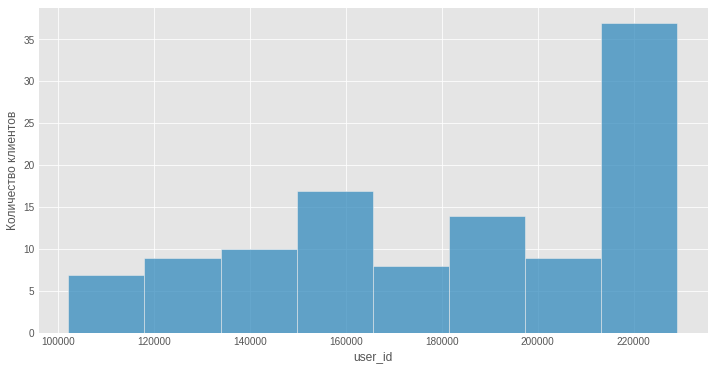

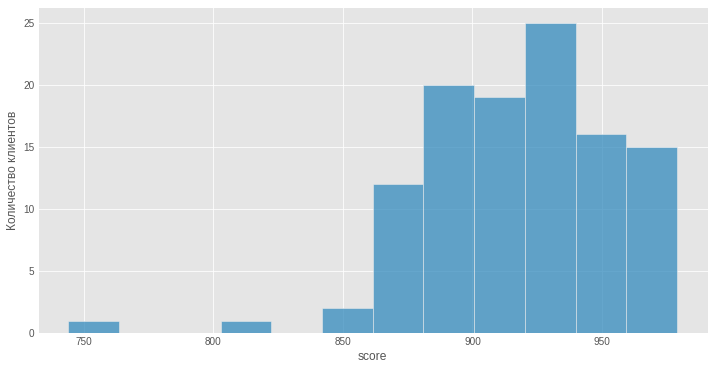

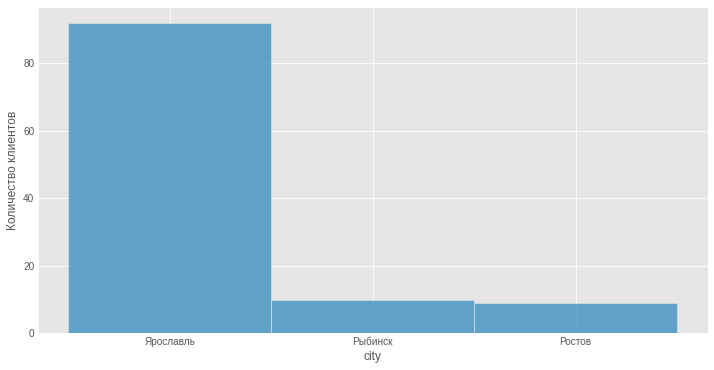

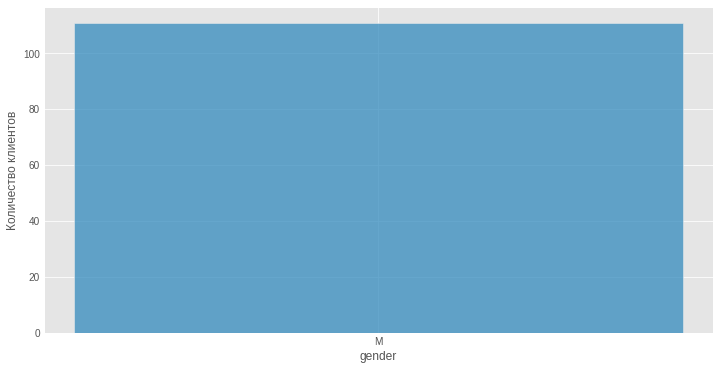

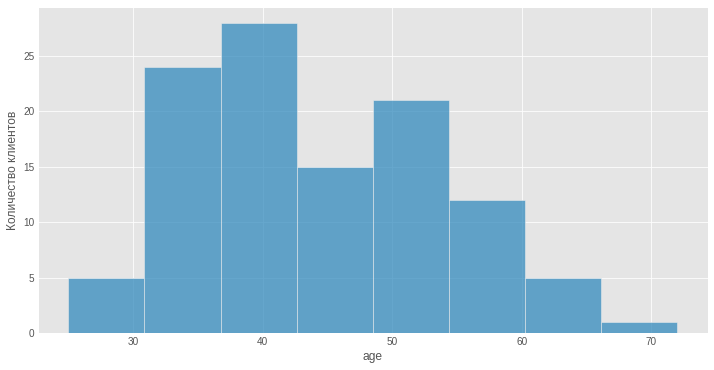

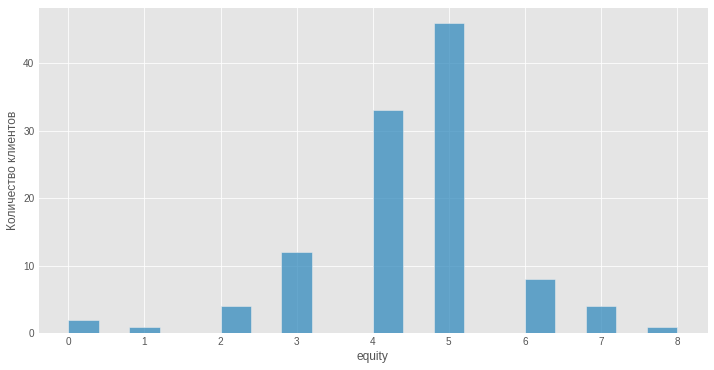

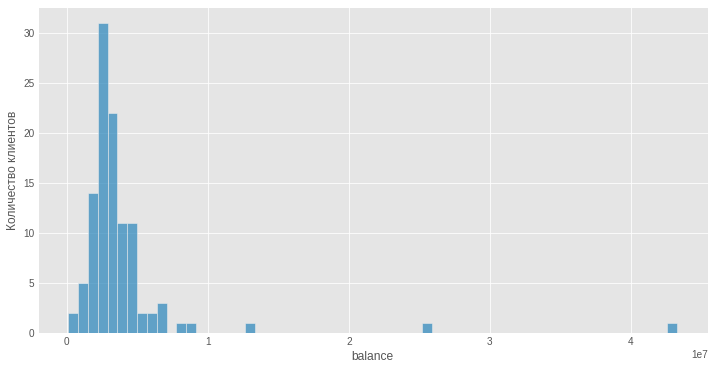

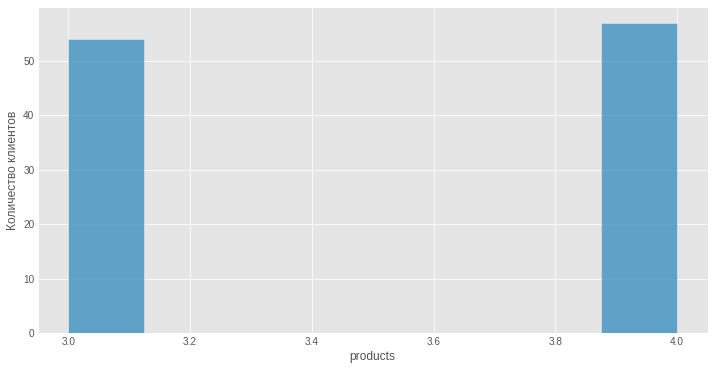

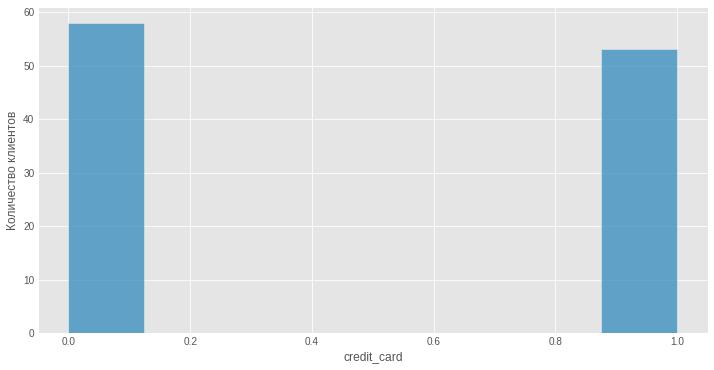

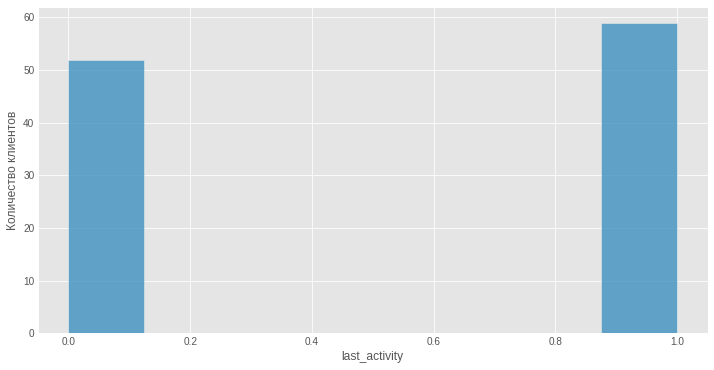

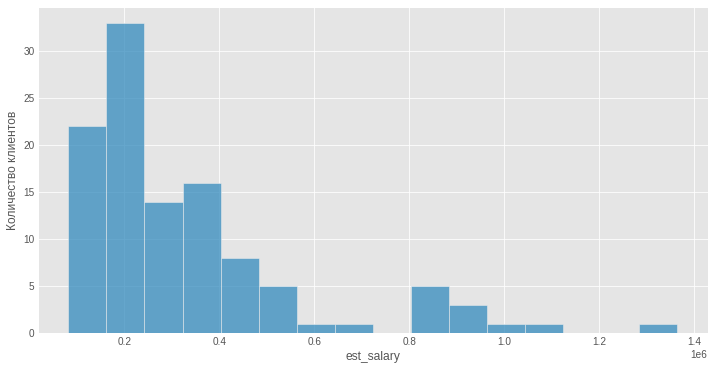

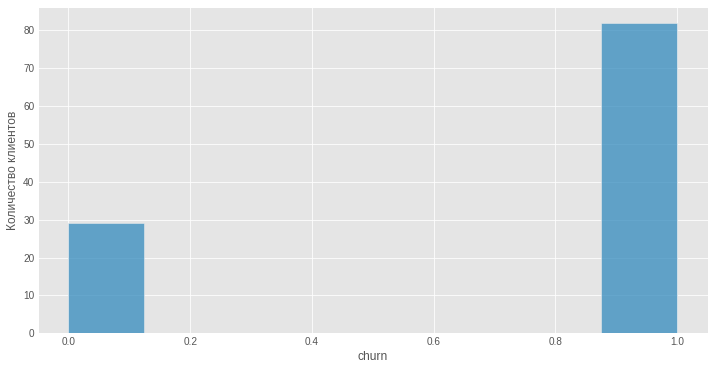

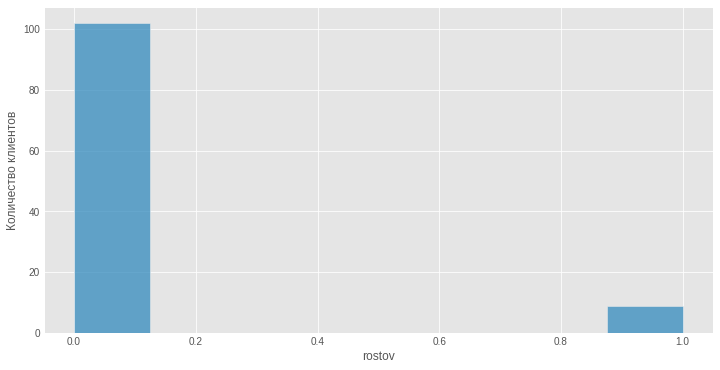

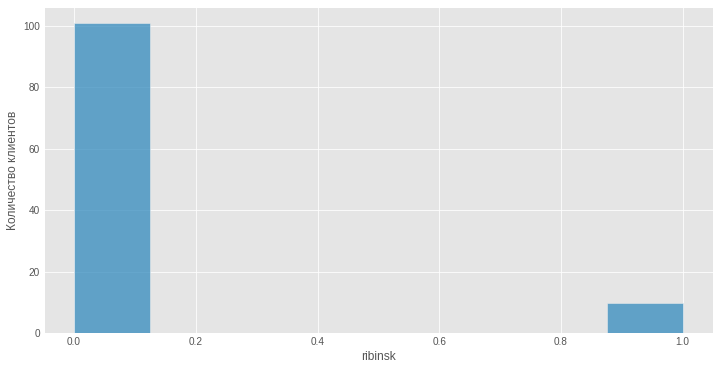

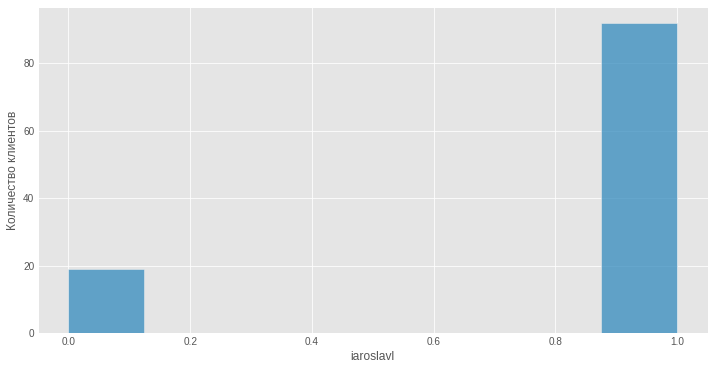

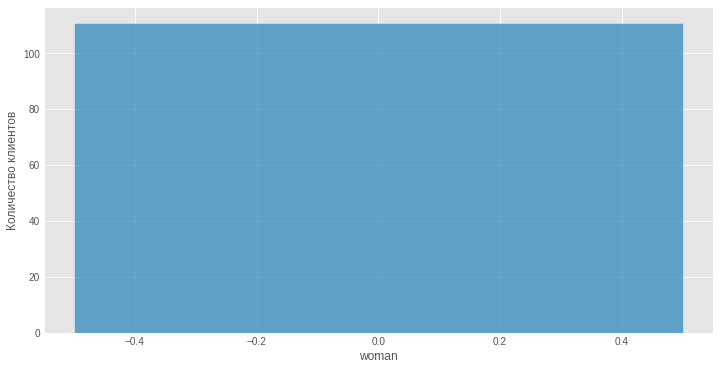

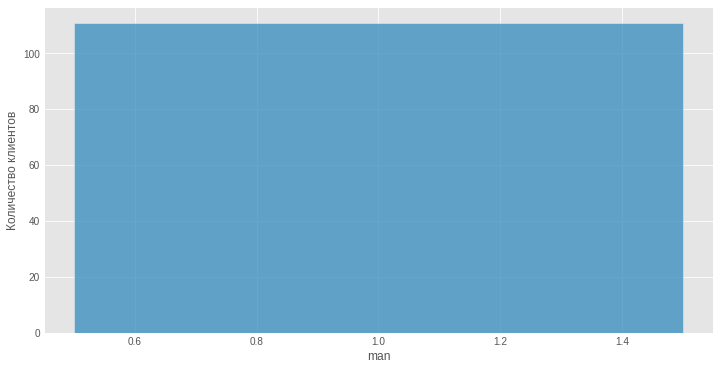

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


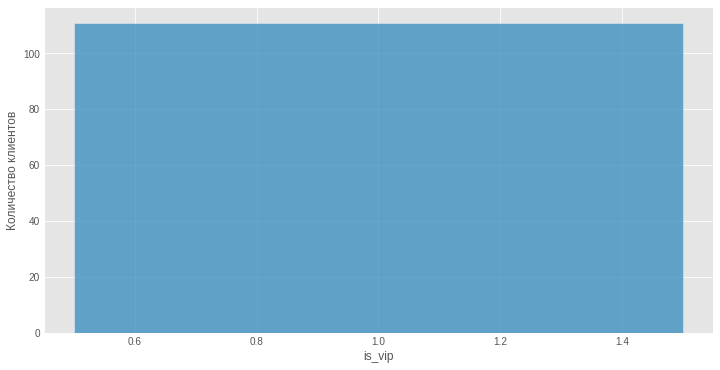

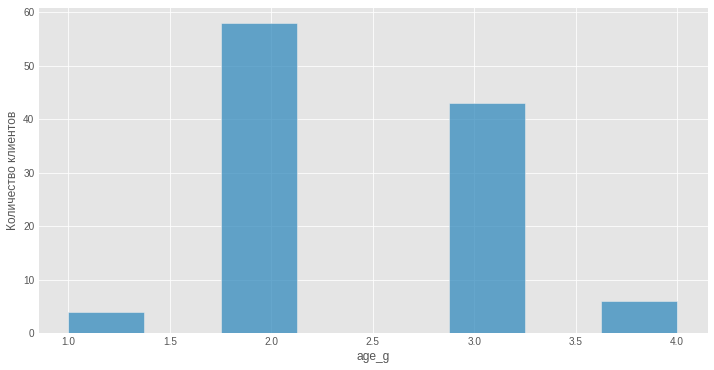

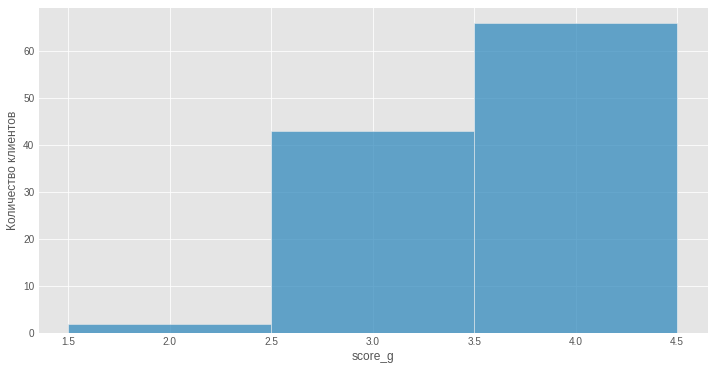

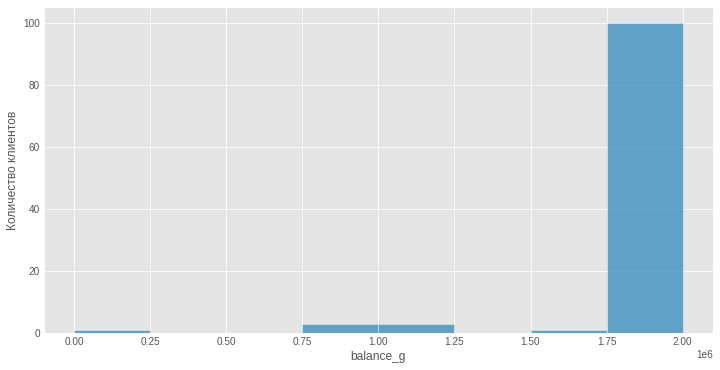

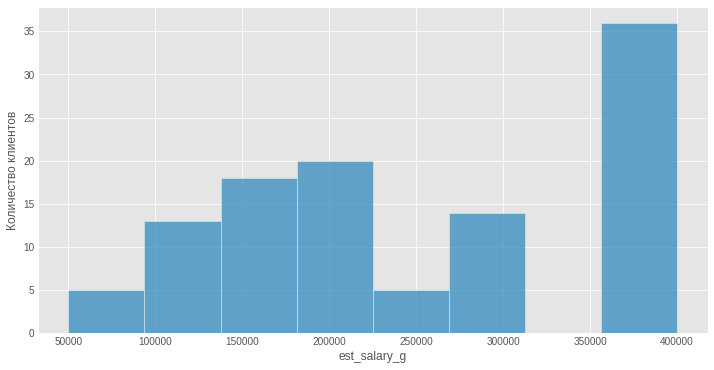

In [119]:
for i in seg_1.columns:
    sns.histplot(data=seg_1, x=i)
    plt.ylabel('Количество клиентов')
    plt.show()

В сегменте есть несколько интересных моментов:
- в последнее время пришло в разы больше клиентов (видно по user_id);
- средитный скоринг почти у всех выше 850;
- подавляющее большинство имеет недвижимость на 4 или 5 баллов;
- больная часть клиентов неактивна.

Теперь поподробней рассмотрим сегмент seg_2.

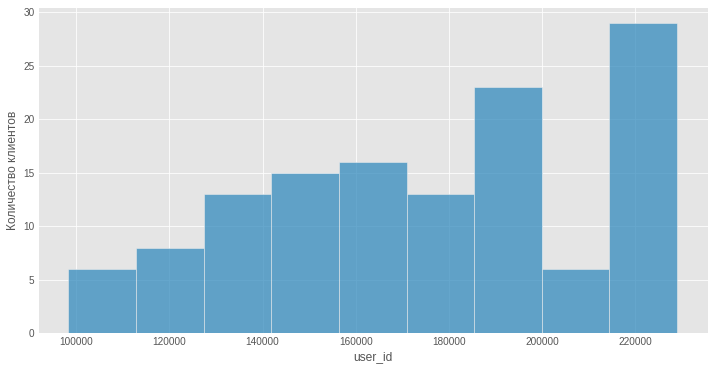

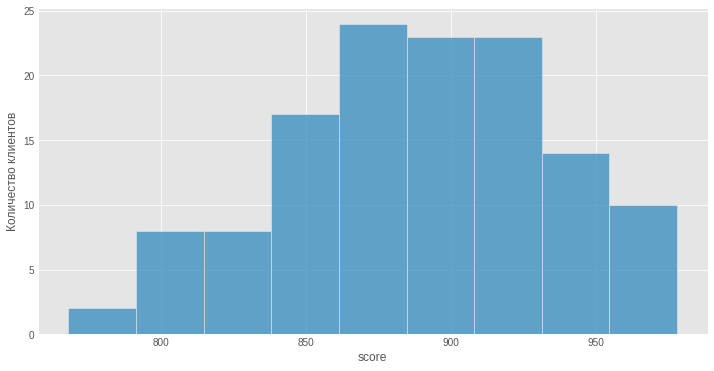

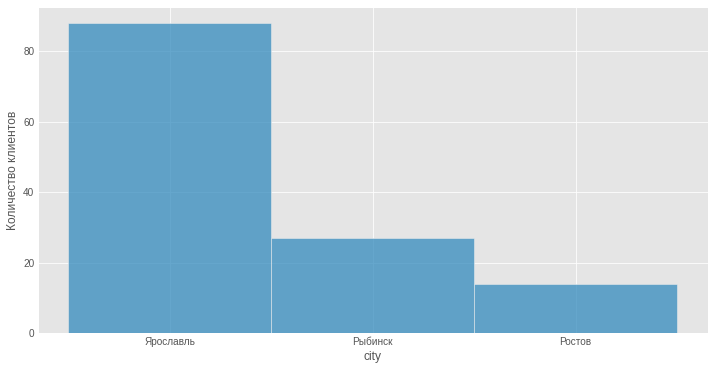

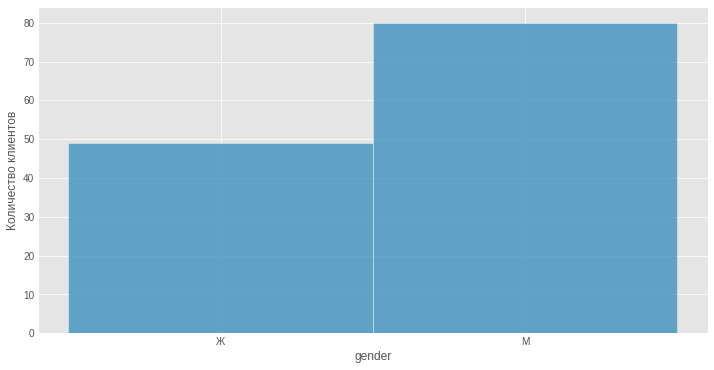

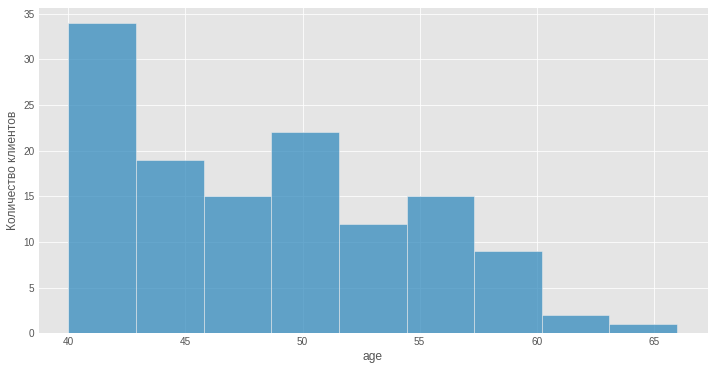

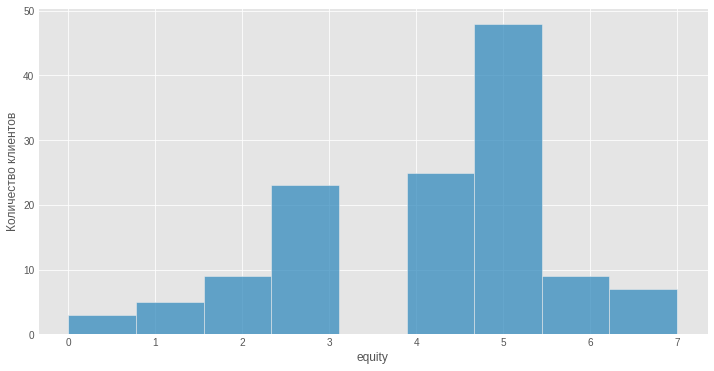

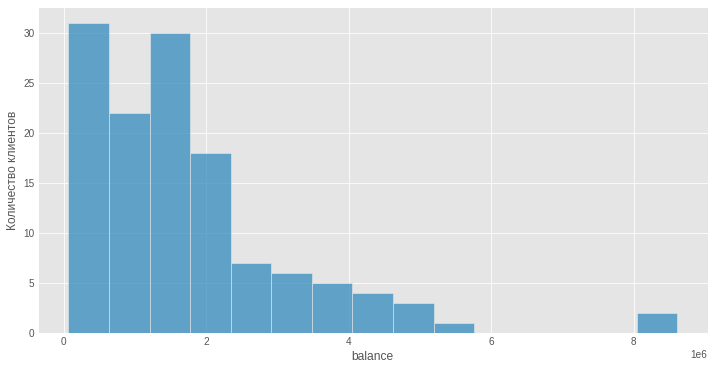

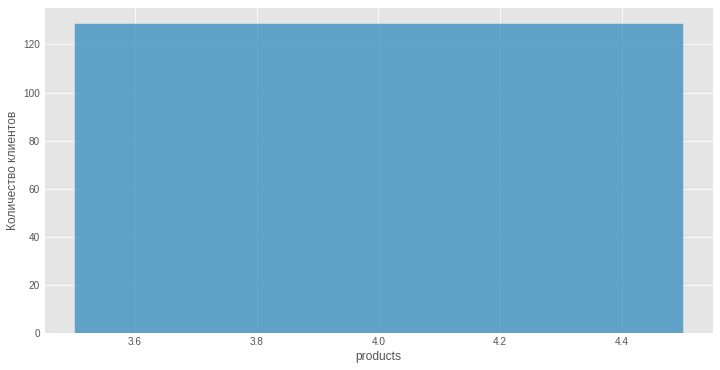

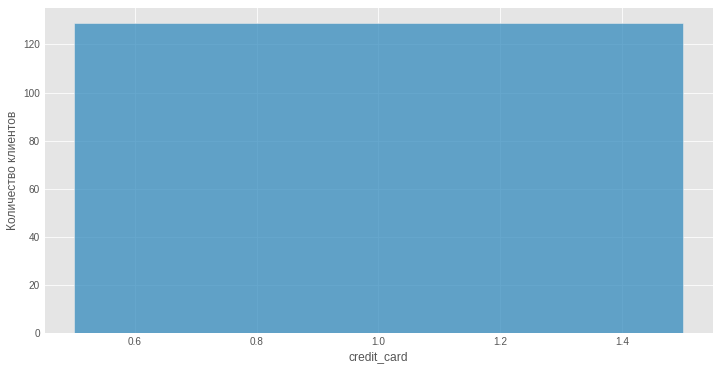

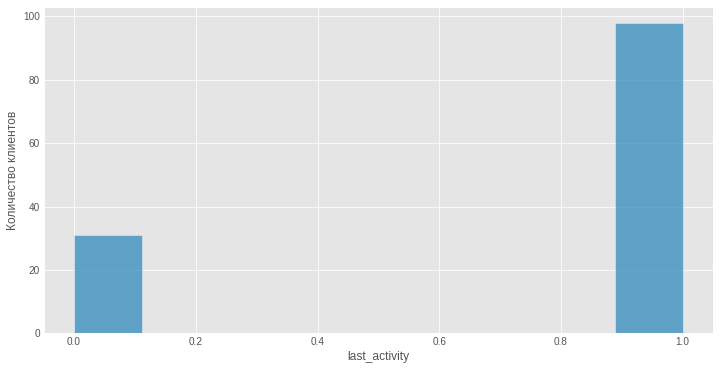

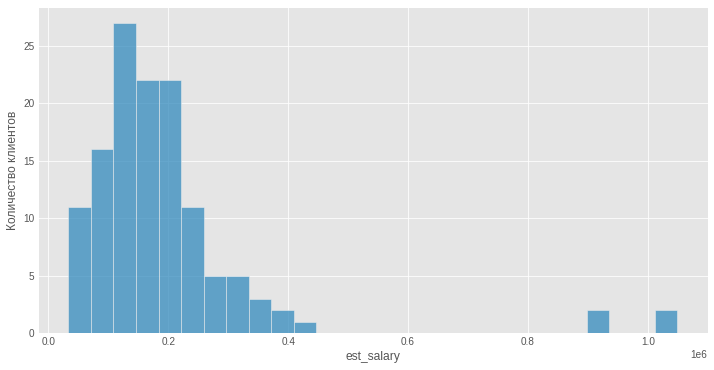

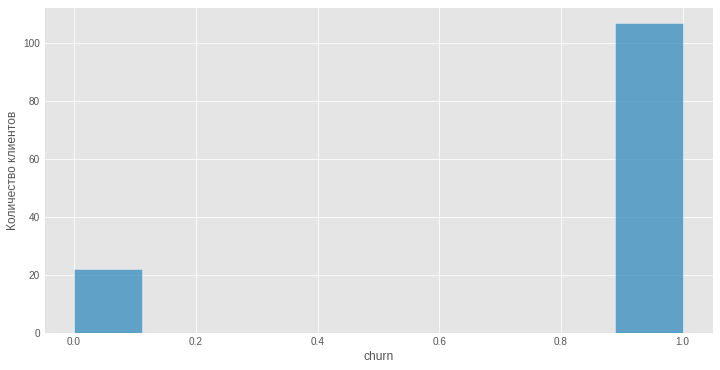

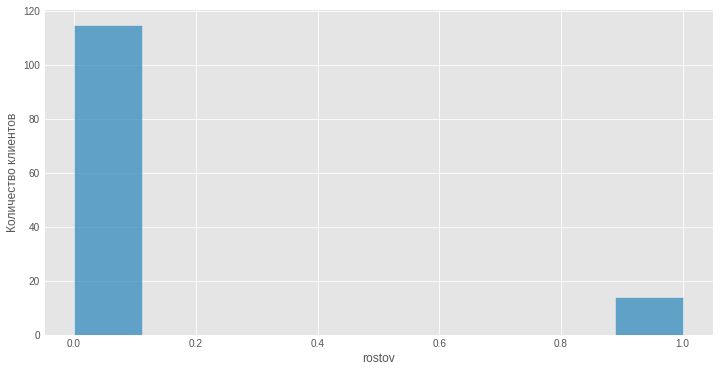

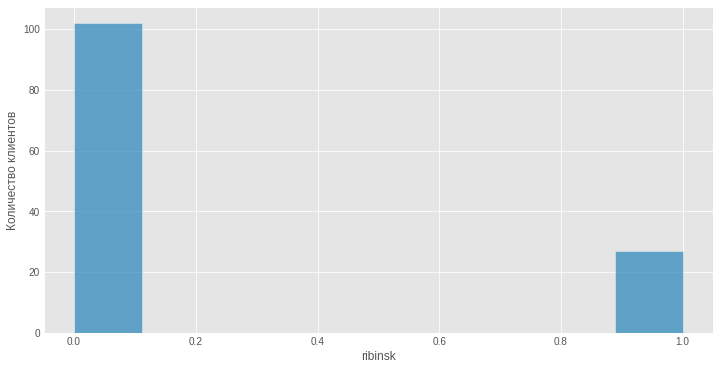

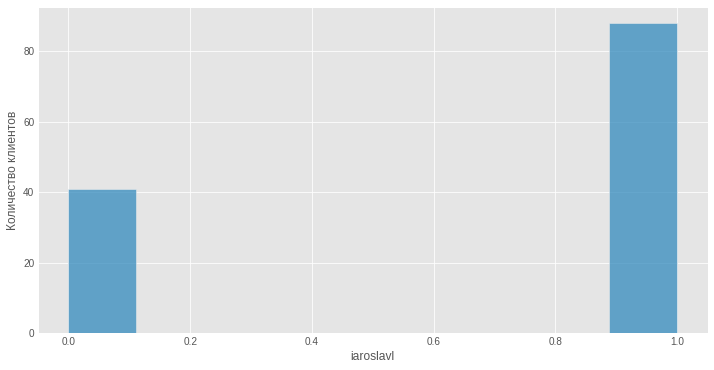

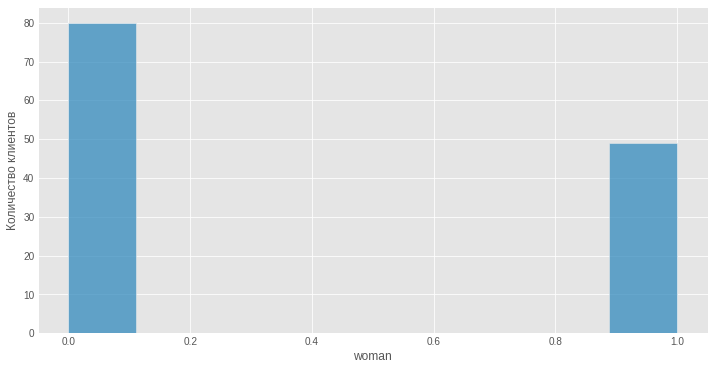

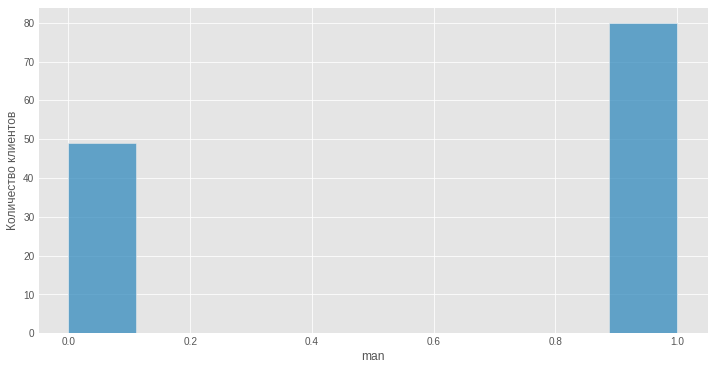

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


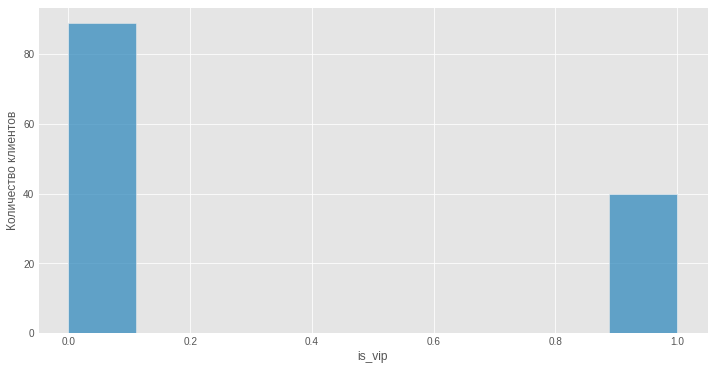

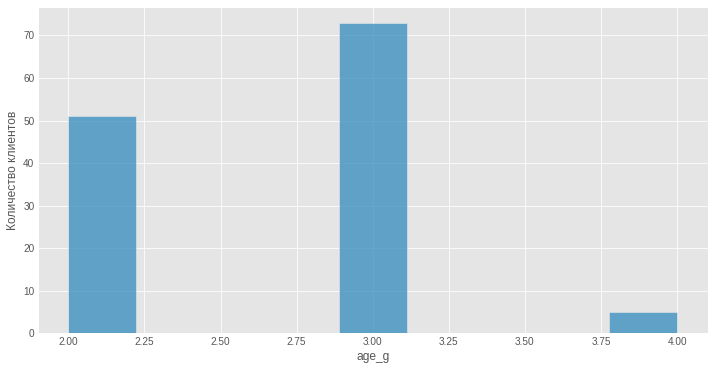

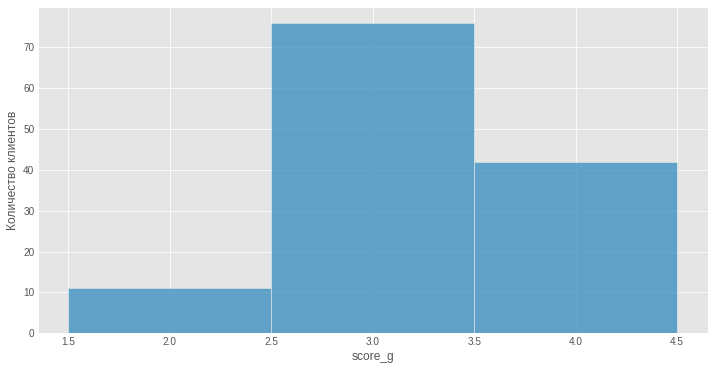

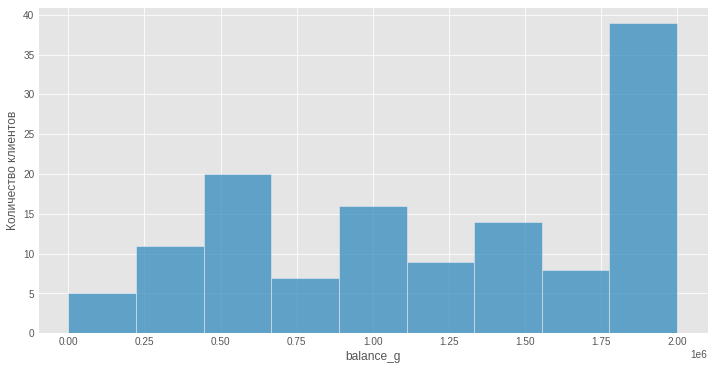

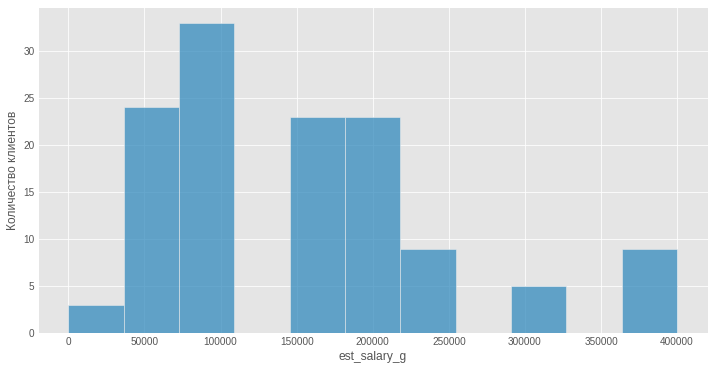

In [120]:
for i in seg_2.columns:
    sns.histplot(data=seg_2, x=i)
    plt.ylabel('Количество клиентов')
    plt.show()

В сегменте 2 есть следующие особенности:

- в два раза больше мужчин, чем женщин;
- большинство имеет недвижимость на 3-5 баллов;
- подавляющее количество - это активные клиенты.

<a id="step6_conc"></a>
## [Выводы по главе 6](#content) ##

Было выявлено 2 сигмента:

Сегментом **1** будут:
- VIP клиенты;
- мужчины;
- использующие от трех продуктов.


Сегментом **2** будет:
- пользующиеся 4м продуктами;
- возраст от 40 до 60;
- имеют кредитную карту.

Данные сегменты активно уходят из банка.

<a id="step7"></a>
## [Глава 7. Выводы и рекомендации для отдела маркетинга](#content) ##

В банке большое количество клиентов, которые имеют высокую заработную плату или большую сумму на счете - VIP клиенты.
- Среди вип клиентов отток сильно выше, чем среди обычных клиентов.
- В банке большое количество клиентов, которые имеют высокую заработную плату или большую сумму на счете; данные клиенты получили дополнительный параметр is_vip.
- Чаще всего кредитный скоринг находится в диапазоне от 775 до 925, у половины клиентов - от 800 до 900. Интересно, что у большинства клиентов с минимальнымы значениями кредитного скоринга есть крединтые карты.
- Больше всего клиентов 36 лет. Медианный возраст - 40 лет. Намного выше средного количества клиентов людей с 28 до 45 лет. Половина распределения клиентов попадает в диапазон от 33 до 51 года. До 48 лет больше клиентов мужчин, после - наоборот.
- Одним и двумя продуктами чаще всего пользуются люди ль 33 до 50-52 лет, медианный возраст - 40; Много выбросов после 75 лет; Тремя продуктами чаще пользуются люди от 35 до 57 лет, медиана тоже немного выше - 42. Тремя продуктами могут пользоваться люди до 84 лет. Четырьмя продуктами люди чаще пользуются от 33 до 46, медиана на уровне 38. Четырьмя продуктами, как правило, могут пользоваться люди до 62 лет. Пятью продуктами пользуются люди от 31 до 40, медиана на уровне 37. Не считая пары выбросов, клиенты старше 37, в принципе, не пользуются пятью продуктами. 
- Больше всего обычных клиентов пользуются двумя продуктами - около 5 000. Следом идут клиенты с 1м продуктом - их около 3 000. Подавляющее число клиентов, пользующихся одним продуктом банка, имеют кредитную карту (более 5/6). Более 3/5 клиентов, пользующихся двумя продуктами банка, имеют кредитную карту. Большинство клиентов с тремя продуктами не используют кредитную карту. Около 2/3 клиентов с 4 продуктами имеют кредитную карту. Клиенты с 5ю продуктами имеют кредитные карты.
- vip плиенты не пользуются пятью продуктами банка, но, в целом, пропорция распределения схожа с обычными клиентами.
- Подавляющее большинство вип клиентов с одним продуктом пользуется именно кредитной картой. А вот более половины клиентов с двумя продуктами обходятся без кредитной карты. Как и клиенты с тремя продуктами - подавляющее большинство не пользуются кредитной картой. С четырьмы продуктами - наоборот.
- Чуть меньше половины как обычных, так и вип клиентов неактивны.


В разрезе оттока:
- Отток новых клиентов растет.
- До, примерно, 825 баллов кредитного скоринга больше тех, кто не уходит из банка. С кредитным скорингом от 825 до, примерно, 910 намного больше тех, кто уходит из банка (скоринг выше среднего).
- Больше всего банк теряет пользователей от 50 до 60 лет.
- Самыми лояльными являются клиенты с балансом до 400 тысяч. Клиенты с сумой на счете более 750 тысяч уходят чаще. Самый большой отток среди клиентов, имеющих на счете от полутора миллионов.
- Чаще уходят клиенты с зарплатой от 100 до 175 тыяч. лиенты с заработной платой до 100 тысяч рублей более лояльны к банку
- Чем больше недвижимости, тем больший процент клиентов уходят.
- Более лояльны клиенты в Рыбинске.
- Мужчины уходят в два раза чаще.
- С увеличением количества используемых продуктов, увеличивается отток. Особенно высокий отток у клиентов с 4мя продуктами.
- Клиенты без кредитной карты уходят чаще.
- Среди вип клиентов отток намного выше.
- Чаще уходят активные клиенты.

В разрезе оттока по количеству используемых продуктов чаще уходят:
- мужчины от 3х продуктов, женщины от 4х;
- с недвижимостью и высоким скорингом или при любом количестве недвижимосити, если пользуются 4мя продуктами;
- с кредитной картой и 4мя продуктами;
- неактивные клиенты с 4мя продуктами или активные от 3х;
- отток у випов выше при любом количестве используемых продуктов;
- самый большой отток у клиентов с 60 по 75 лет с 4мя продуктами.
- с балансом от 750 тысяч и 4мя продуктами;
- с зарплатой от 100 тысяч и также 4мя продуктами.

Было выделено два сегмента, которые активно покидают банк:

Было выявлено 2 сигмента:

Сегментом **1** будут:
- VIP клиенты;
- мужчины;
- использующие от трех продуктов.


Сегментом **2** будет:
- пользующиеся 4м продуктами;
- возраст от 40 до 75;
- имеют кредитную карту.

Данные сегменты активно уходят из банка. В сегменте 1 - 73,8% клиентов уходят, в сегменте 2 - 83%.

Данные сегменты объединяет то, что данные клиенты используют большое количество банковских продуктов.
В сегменте 1 - это вип клиенты с высокой зарплатой или большим счетом. Скорее всего, в банке прохо работает / плохо выдерживает конкуренцию продукт, который заточен под достаточный объем средств. Можно предположить, что это инвестиционные продукт. Более того, в сегменте представлены мужчины. По открытой статистике, пока что мужчины чаще женщин интересуются инвестициями.
Необходимо проверить инвестиционные продукты, сравнить их с конкурентами. Также, возможно, проблема кроется в удобности взаимосвязи продуктов в приложении (к примеру, неудобно или долго переводить деньги с инвестиционного счета на депозит и тд.)

Также, раз это вип клиенты, зарплата или сумма на счете которых намного выше средних показателей, они хотят премиального обслуживания. Необходимо проработать улучшенное обслуживание таких клиентов, если его нет или сравнить с конкурентами и улучшить, если уже есть. Возможно сейчас клиенты активно уходят в банк с улучшенным сервисом.

В сегменте 2 один из продуктов - кредитная карта. В подобном возрастном сегменте и с 4мя продуктами, но без кредитной карты лояльность клиентов намного выше. Следовательно, одна из главных причин - условия по кредитной карте. Так как подавляющее большинство - это активные клиенты, скорее всего, они постоянно пользуются своими продуктами и неконкурентные условия по кредитной карте - это повод оперативно уйти в другую организацию.
Но такого большого оттока не видно среди пользователей, использующих 3 или меньше банковских продуктов. Значит, вторая из главных причин оттока - это взаимосвять кредитной карты с банковским продуктом, которым чаще пользуются клиенты с 4мя продуктами, но еще не пользуются с тремя. Необходимо проанализировать данную взаимосвязь.
Также здесь могут быть причины, которые относятся к сегменту 1.

Обобщая, нужно проанализировать:
1. Условия по кредитным картам
2. Инвестиционные продукты
3. Взаимосвязь между продуктами
4. Взаимосвязь кредитной карты с продуктом, которым чаще начинают пользоваться только 4м из банковских продуктов.